In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, gc
import pickle
import datetime
from tqdm import tqdm_notebook as tqdm


from sklearn import preprocessing

%matplotlib inline

In [2]:
path = '/Users/kanoumotoharu/Downloads/m5-forecasting-accuracy/'

In [3]:
os.listdir(path)

['calendar.csv',
 'sell_prices.csv',
 'sales_train_validation.csv',
 'sample_submission.csv']

In [4]:
%%time
train_df = pd.read_csv(path+'sales_train_validation.csv')
calendar_df = pd.read_csv(path+'calendar.csv')
sell_prices_df = pd.read_csv(path+'sell_prices.csv')
sample_submission_df = pd.read_csv(path+'sample_submission.csv')

CPU times: user 11.8 s, sys: 1.15 s, total: 12.9 s
Wall time: 12.9 s


In [5]:
train_df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4   ...    d_1904  d_1905  d_1906  d_1907  \
0       CA    0    0    0    0   ...         1       3       0       1   
1       CA    0    0    0    0   ...         0       0       0       0   
2       CA    0    0    0    0   ...         2       1       2       1   
3       CA    0    0    0    0   ...         1       0       5       4   
4       CA    0    0    0    0   ...         2       1       1       0   

   d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       1       3       0       1       1  
1       0       1       0       0       0       0  
2       1       1       0       1       1       1  
3       1       0       1       3       7       2  
4       1       1       2       2       2       4  

[5 rows x 1919 columns]

In [6]:
calendar_df.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [7]:
sell_prices_df.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [8]:
d_cols = [f'd_{i}' for i in range(1,1914)]

In [9]:
data = train_df.set_index('id')[d_cols].T
data.reset_index(drop=True, inplace=True)

In [10]:
calendar_df.date = pd.to_datetime(calendar_df.date)

In [11]:
calendar_df2 = calendar_df[:1913]

In [12]:
data = pd.concat([
    calendar_df2[['date', 'weekday']],
    data
],axis=1)

In [13]:
train_df.store_id.unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [14]:
corr_dict = {}
store_id = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
for store in tqdm(store_id):
    tmp_df = data.iloc[-84:,data.columns.str.contains(store)]
    mean = tmp_df.mean(axis=0)
    tmp_df = tmp_df.loc[:,mean>1.5]
    corr_dict[store] = tmp_df.iloc[-84:,tmp_df.columns.str.contains(store)].corr()

In [15]:
with open('corr_dict.pkl', mode='wb') as f:
    pickle.dump(corr_dict, f)

In [16]:
"""
for key, value in corr_dict.items():
    plt.figure(figsize=(30,30))
    sns.heatmap(value, cmap='coolwarm', annot=True)
    plt.show()
"""

"\nfor key, value in corr_dict.items():\n    plt.figure(figsize=(30,30))\n    sns.heatmap(value, cmap='coolwarm', annot=True)\n    plt.show()\n"

In [17]:
corr_dict.keys()

dict_keys(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3'])

In [18]:
corr = corr_dict['CA_1']
a = corr[abs(corr)>0.5].isnull().mean(axis=1)
a = a.sort_values()

In [19]:
#data.loc[:, data.columns.str.contains('CA_1')].iloc[-365:,:]

In [20]:
#data.loc[:,a.index[:10]].iloc[-365:,:]

In [21]:
a.head()

FOODS_3_540_CA_1_validation    0.967192
FOODS_3_147_CA_1_validation    0.971129
FOODS_3_592_CA_1_validation    0.972441
FOODS_3_714_CA_1_validation    0.972441
FOODS_3_618_CA_1_validation    0.973753
dtype: float64

In [22]:
del train_df, calendar_df
gc.collect()

42

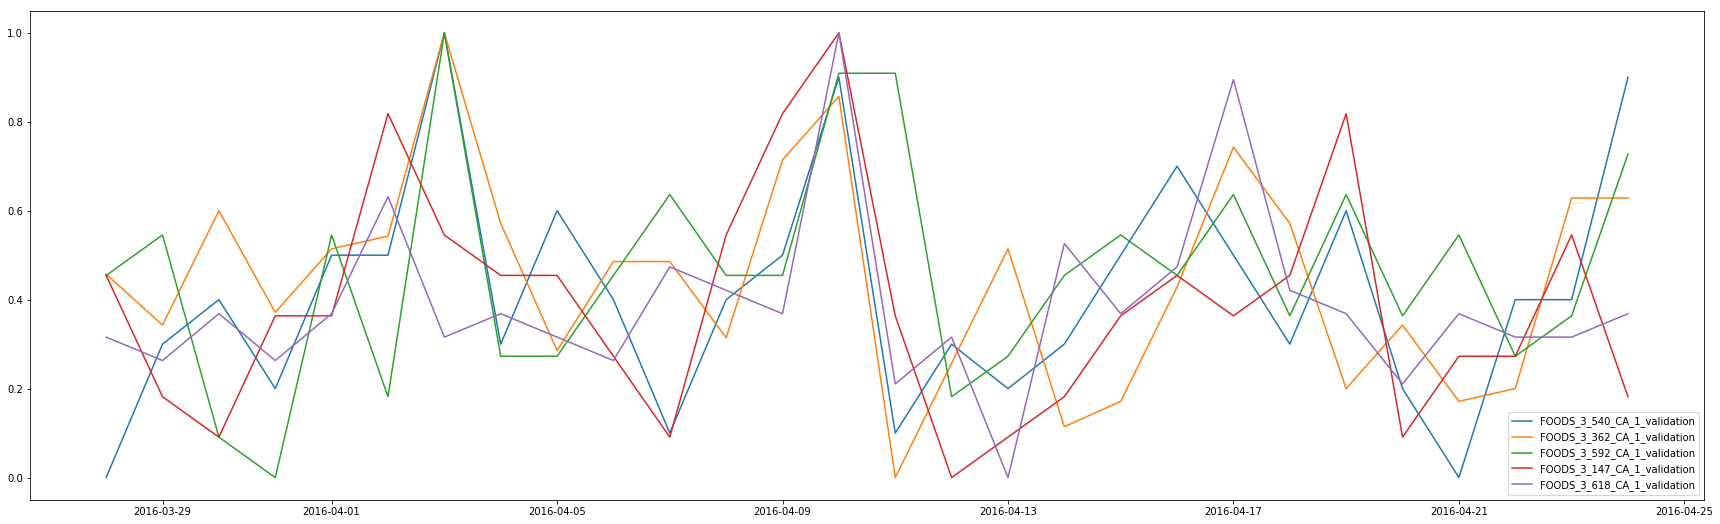

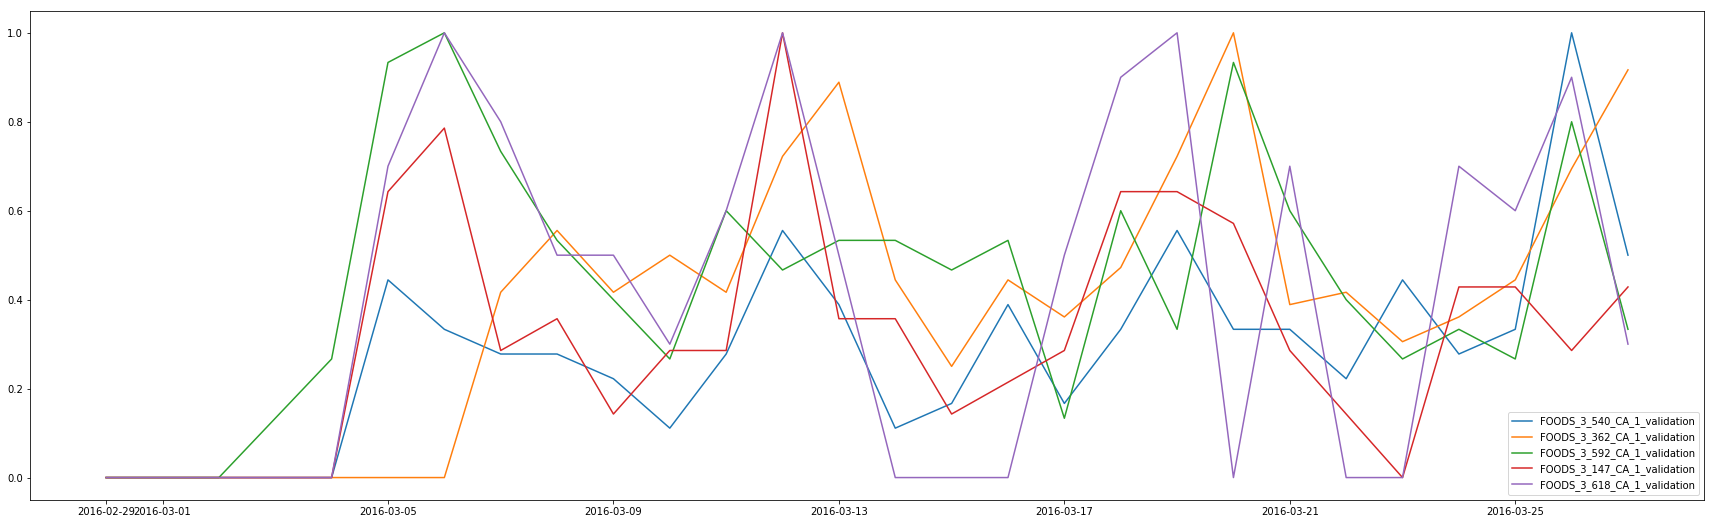

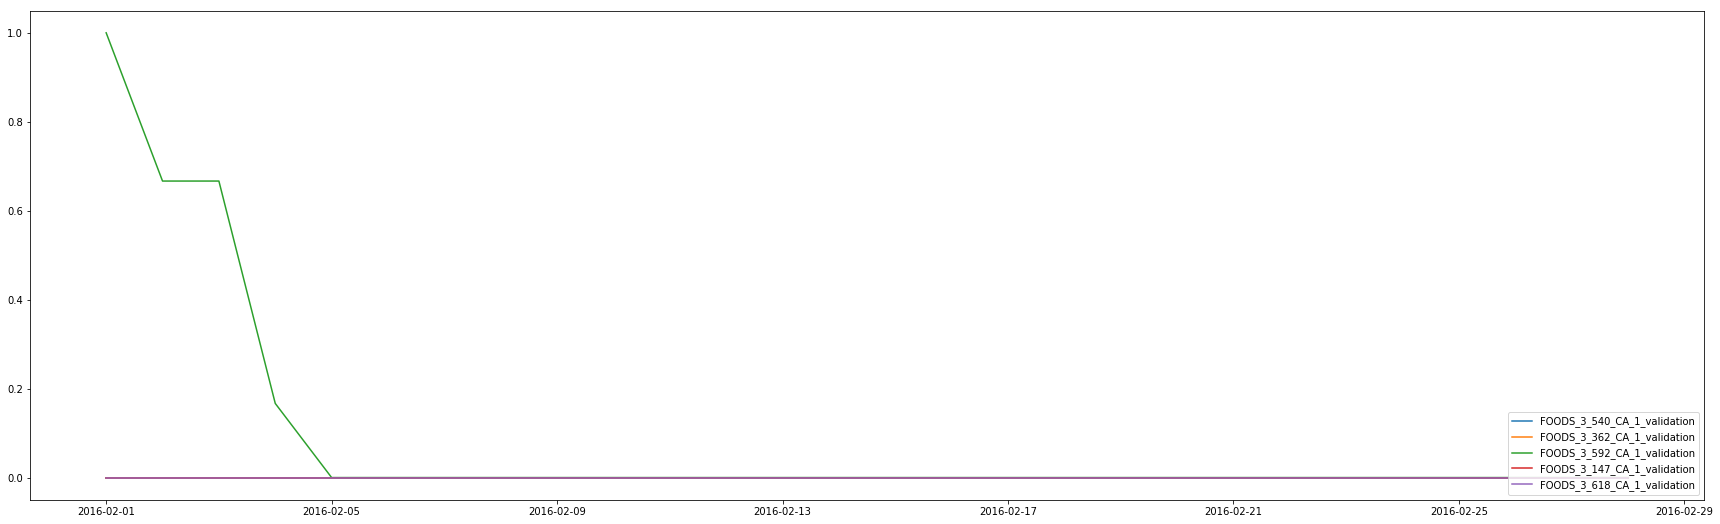

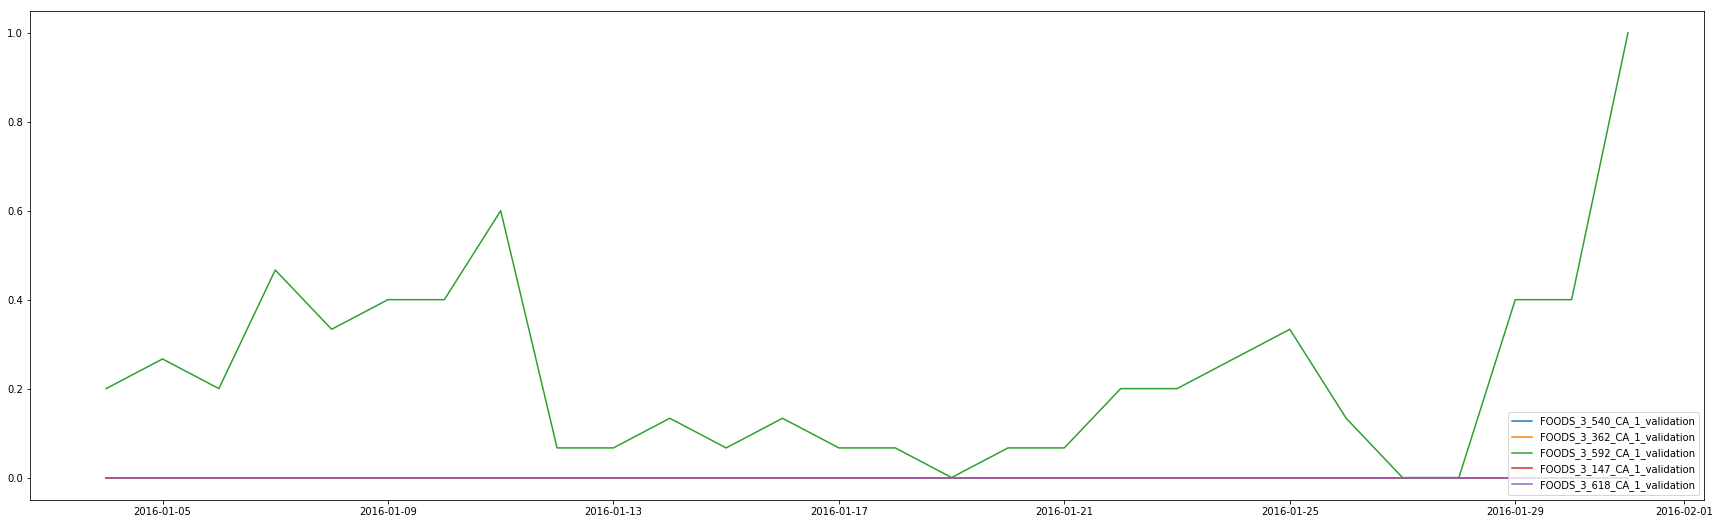

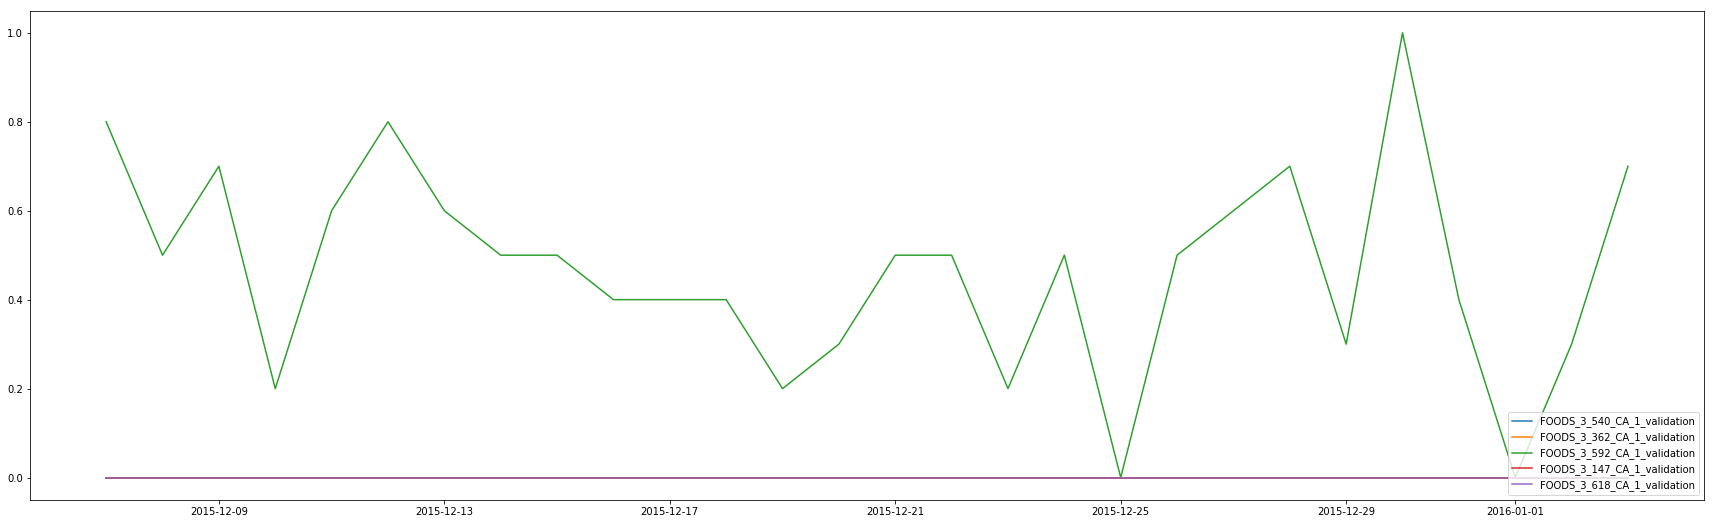

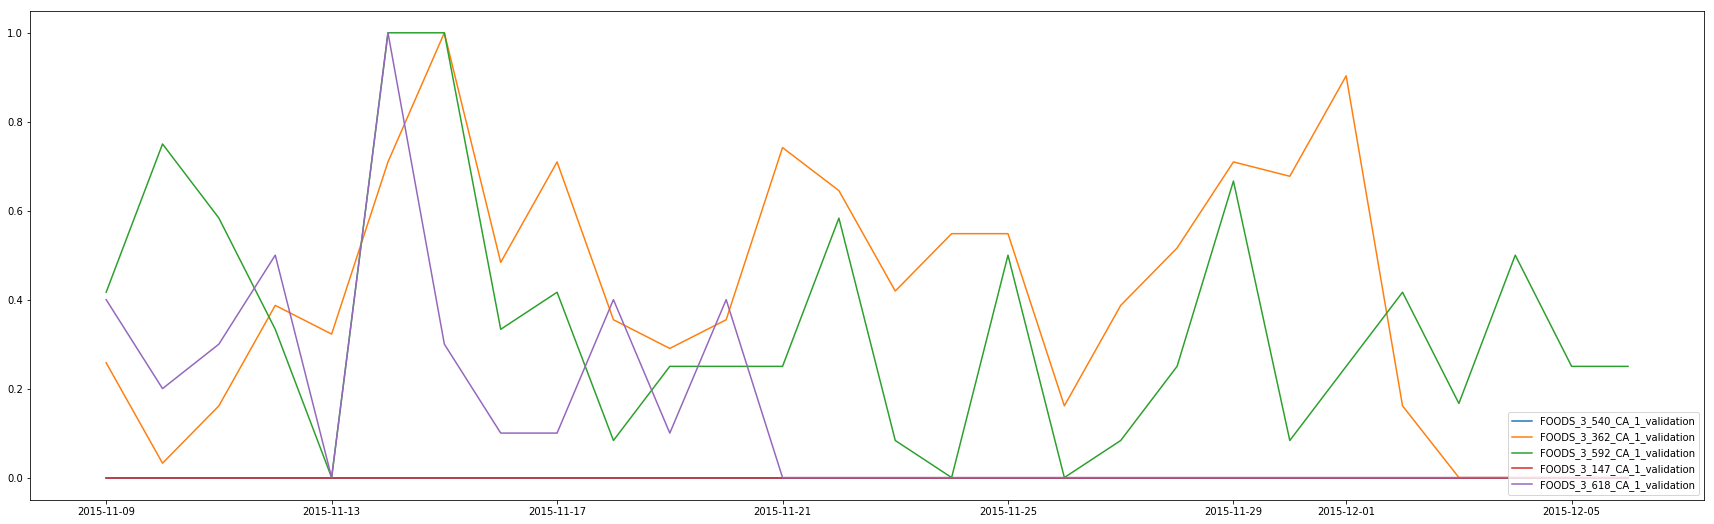

In [23]:
d = 28

prnt_col = 'FOODS_3_540_CA_1_validation'

plt.figure(figsize=(30,9))
for col in corr[prnt_col].sort_values(ascending=False).index[:5]:
    val = preprocessing.minmax_scale(data[col][-d:])
    plt.plot(data.date[-d:], val, label=col)
plt.legend(loc=4)
plt.show()

for i in range(1, 6):
    plt.figure(figsize=(30,9))
    for col in corr[prnt_col].sort_values(ascending=False).index[:5]:
        val = preprocessing.minmax_scale(data[col][-d*(i+1):-d*i])
        plt.plot(data.date[-d*(i+1):-d*(i)], val, label=col)
    plt.legend(loc=4)
    plt.show()

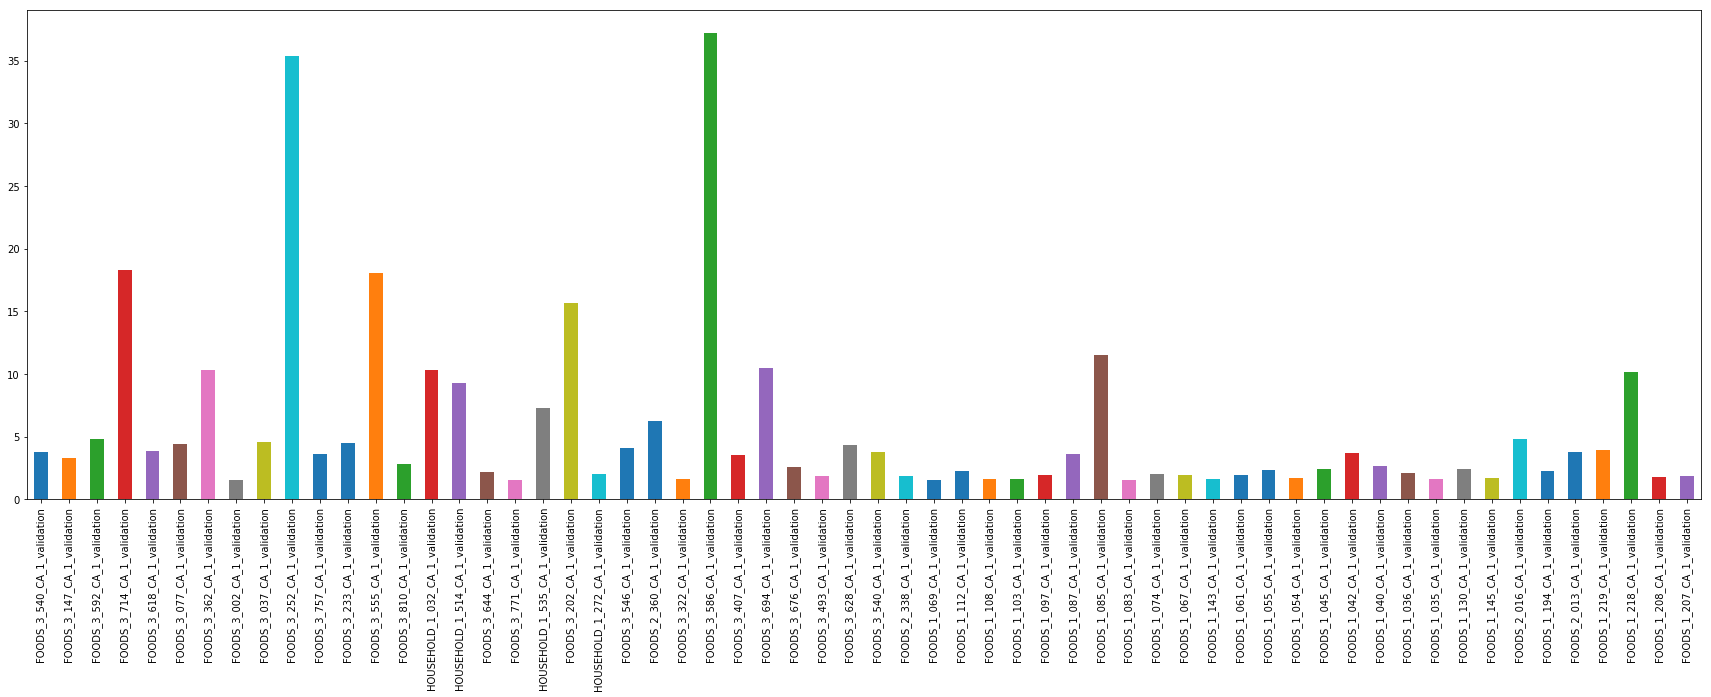

In [24]:
plt.figure(figsize=(30,9))
data[a.index].iloc[-84:, [i for i in range(30)]+[-i for i in range(30)]].mean(axis=0).plot('bar')

In [25]:
data2 = data.iloc[:,2:].rolling(21, min_periods=1).sum()
data3 = data.iloc[::-1,2:].rolling(21, min_periods=1).sum()

In [26]:
data3 = data3.iloc[::-1, :]

In [27]:
data2[data2==0]=np.nan
data3[data3==0]=np.nan

In [28]:
data2 = (data2+data3)/2

In [29]:
del data3

In [30]:
data2 = pd.concat([
    data.iloc[:,:2],
    data2
], axis=1)

In [31]:
data3 = data.copy()
data3[data2.isnull()]=np.nan
data2 = data3
del data3

In [32]:
data.head()

date    weekday  HOBBIES_1_001_CA_1_validation  \
0 2011-01-29   Saturday                              0   
1 2011-01-30     Sunday                              0   
2 2011-01-31     Monday                              0   
3 2011-02-01    Tuesday                              0   
4 2011-02-02  Wednesday                              0   

   HOBBIES_1_002_CA_1_validation  HOBBIES_1_003_CA_1_validation  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   HOBBIES_1_004_CA_1_validation  HOBBIES_1_005_CA_1_validation  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   HOBBIES_1_006_CA_1_validation  HOBBIES_1_007_CA_1_validation  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   HOBBIES_1_008_CA_1_validation             ...               \
0                             12             ...                
1                             15             ...                
2                              0             ...                
3                              0             ...                
4                              0             ...                

   FOODS_3_818_WI_3_validation  FOODS_3_819_WI_3_validation  \
0                            0                           14   
1                            0                           11   
2                            0                            5   
3                            0                            6   
4                            0                            5   

   FOODS_3_820_WI_3_validation  FOODS_3_821_WI_3_validation  \
0                            1                            0   
1                            1                            0   
2                            1                            0   
3                            1                            0   
4                            1                            0   

   FOODS_3_822_WI_3_validation  FOODS_3_823_WI_3_validation  \
0                            4                            0   
1                            4                            0   
2                            2                            2   
3                            5                            2   
4                            2                            0   

   FOODS_3_824_WI_3_validation  FOODS_3_825_WI_3_validation  \
0                            0                            0   
1                            0                            6   
2                            0                            0   
3                            0                            2   
4                            0                            2   

   FOODS_3_826_WI_3_validation  FOODS_3_827_WI_3_validation  
0                            0                            0  
1                            0                            0  
2                            0                            0  
3                            0                            0  
4                            0                            0  

[5 rows x 30492 columns]

In [33]:
data2.head()

date    weekday  HOBBIES_1_001_CA_1_validation  \
0 2011-01-29   Saturday                            NaN   
1 2011-01-30     Sunday                            NaN   
2 2011-01-31     Monday                            NaN   
3 2011-02-01    Tuesday                            NaN   
4 2011-02-02  Wednesday                            NaN   

   HOBBIES_1_002_CA_1_validation  HOBBIES_1_003_CA_1_validation  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   HOBBIES_1_004_CA_1_validation  HOBBIES_1_005_CA_1_validation  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   HOBBIES_1_006_CA_1_validation  HOBBIES_1_007_CA_1_validation  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   HOBBIES_1_008_CA_1_validation             ...               \
0                           12.0             ...                
1                           15.0             ...                
2                            0.0             ...                
3                            0.0             ...                
4                            0.0             ...                

   FOODS_3_818_WI_3_validation  FOODS_3_819_WI_3_validation  \
0                          NaN                         14.0   
1                          NaN                         11.0   
2                          NaN                          5.0   
3                          NaN                          6.0   
4                          NaN                          5.0   

   FOODS_3_820_WI_3_validation  FOODS_3_821_WI_3_validation  \
0                            1                          NaN   
1                            1                          NaN   
2                            1                          NaN   
3                            1                          NaN   
4                            1                          NaN   

   FOODS_3_822_WI_3_validation  FOODS_3_823_WI_3_validation  \
0                          4.0                          NaN   
1                          4.0                          NaN   
2                          2.0                          2.0   
3                          5.0                          2.0   
4                          2.0                          0.0   

   FOODS_3_824_WI_3_validation  FOODS_3_825_WI_3_validation  \
0                          NaN                          NaN   
1                          NaN                          6.0   
2                          NaN                          0.0   
3                          NaN                          2.0   
4                          NaN                          2.0   

   FOODS_3_826_WI_3_validation  FOODS_3_827_WI_3_validation  
0                          NaN                          NaN  
1                          NaN                          NaN  
2                          NaN                          NaN  
3                          NaN                          NaN  
4                          NaN                          NaN  

[5 rows x 30492 columns]

##### 売らない期間がだいたい一定のものも存在する

<p>売り切れから入荷までの時間が一定？？</p>
<p>部分的に見ると入荷日(再び売り始める日)が同じものがある.</p>

In [34]:
def plot_special(data, **kwargs):
    t_l=[]
    t_val=[]
    plt.figure(figsize=(30,6))
    if data.isnull().sum().sum()==0:
        plt.plot(data.iloc[:,0], data.iloc[:,1], **kwargs)
        plt.title(data.columns[1])
    else:
        for lll, val in enumerate(data.values):
            if val[1]!=np.nan:
                t_l.append(val[0])
                t_val.append(val[1])
            if (np.isnan(val[1]))or(lll==len(data.values)-1):
                if len(t_l)>0:
                    plt.plot(t_l, t_val, **kwargs)
                t_l=[]
                t_val=[]
        plt.title(data.columns[1])

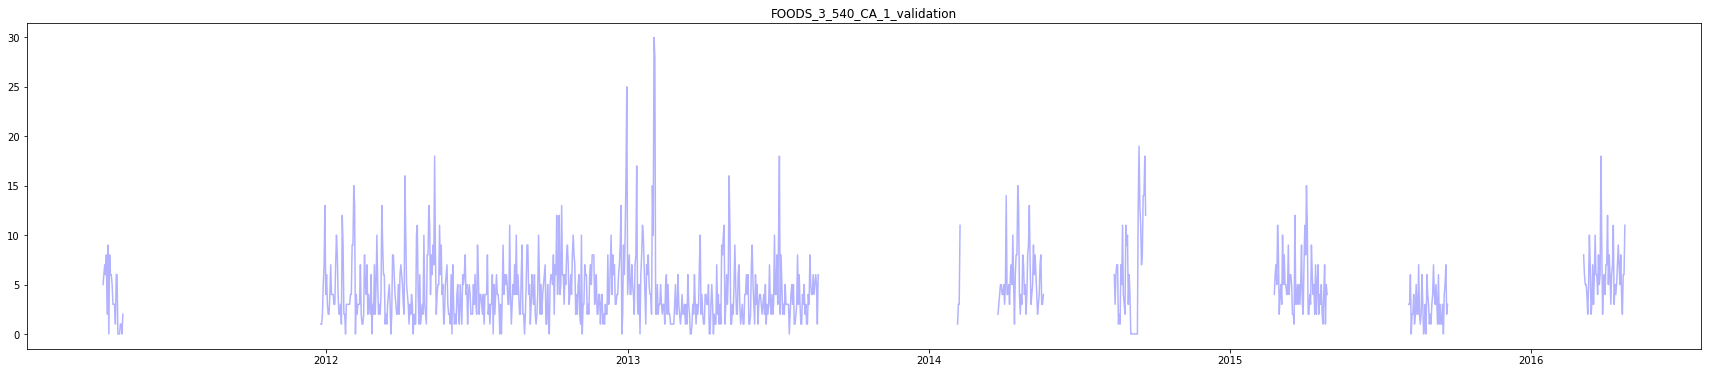

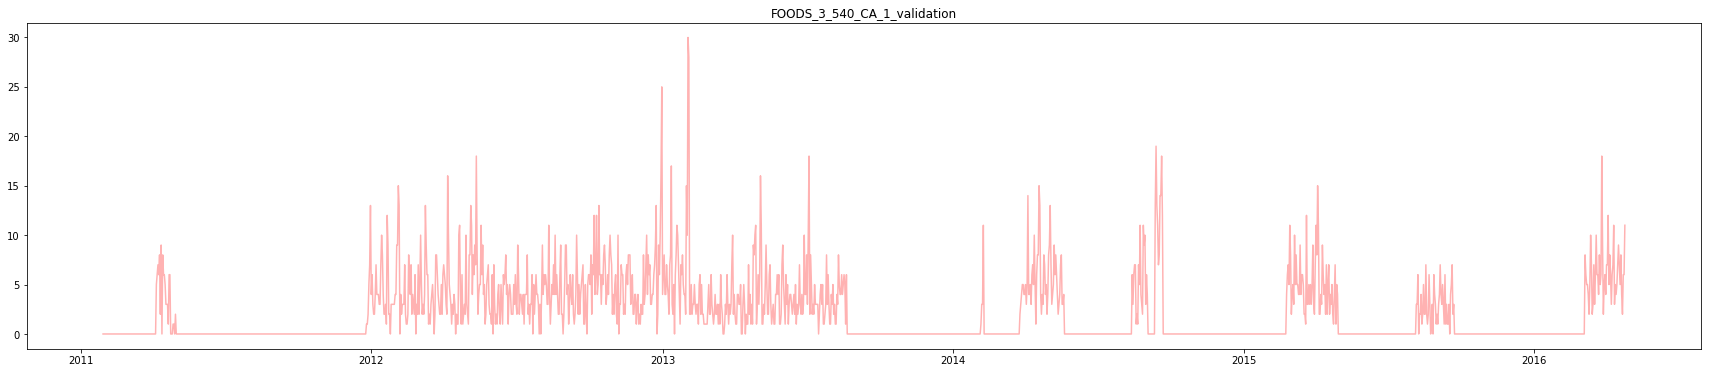

index 2011-04-30 00:00:00
next_index 2011-12-26 00:00:00
   
index 2013-08-20 00:00:00
next_index 2014-02-05 00:00:00
   
index 2014-02-08 00:00:00
next_index 2014-03-26 00:00:00
   
index 2014-05-20 00:00:00
next_index 2014-08-14 00:00:00
   
index 2014-09-21 00:00:00
next_index 2015-02-24 00:00:00
   
index 2015-04-29 00:00:00
next_index 2015-08-06 00:00:00
   
index 2015-09-22 00:00:00
next_index 2016-03-05 00:00:00
   


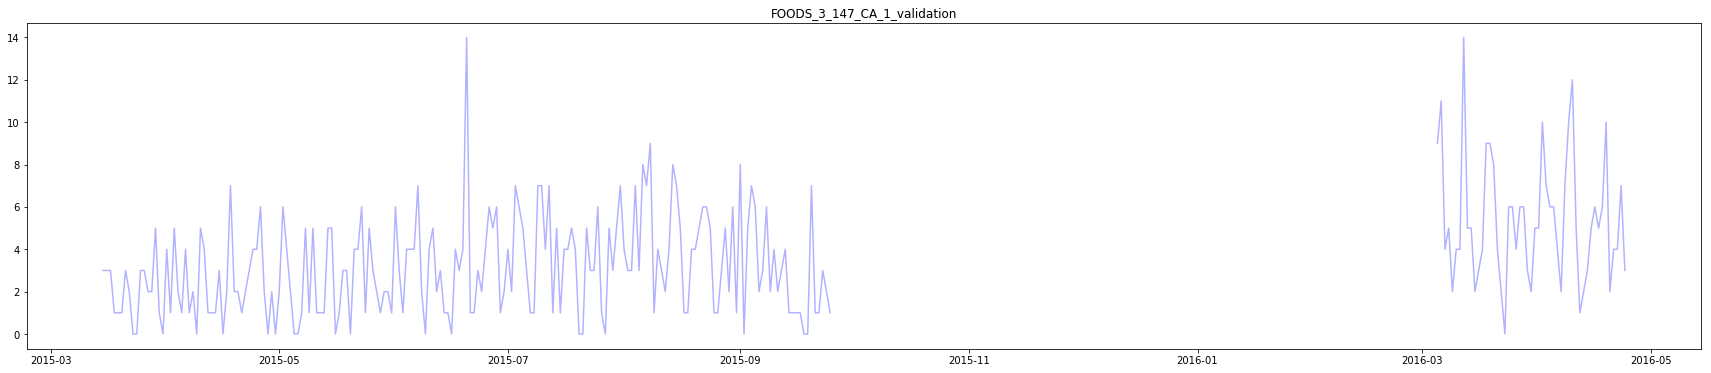

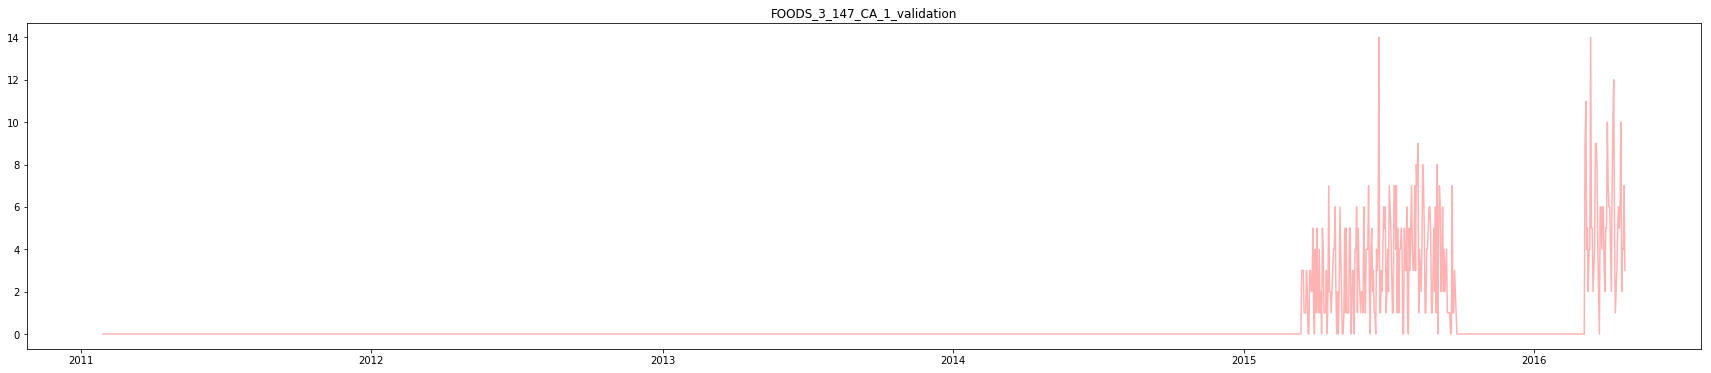

index 2015-09-25 00:00:00
next_index 2016-03-05 00:00:00
   


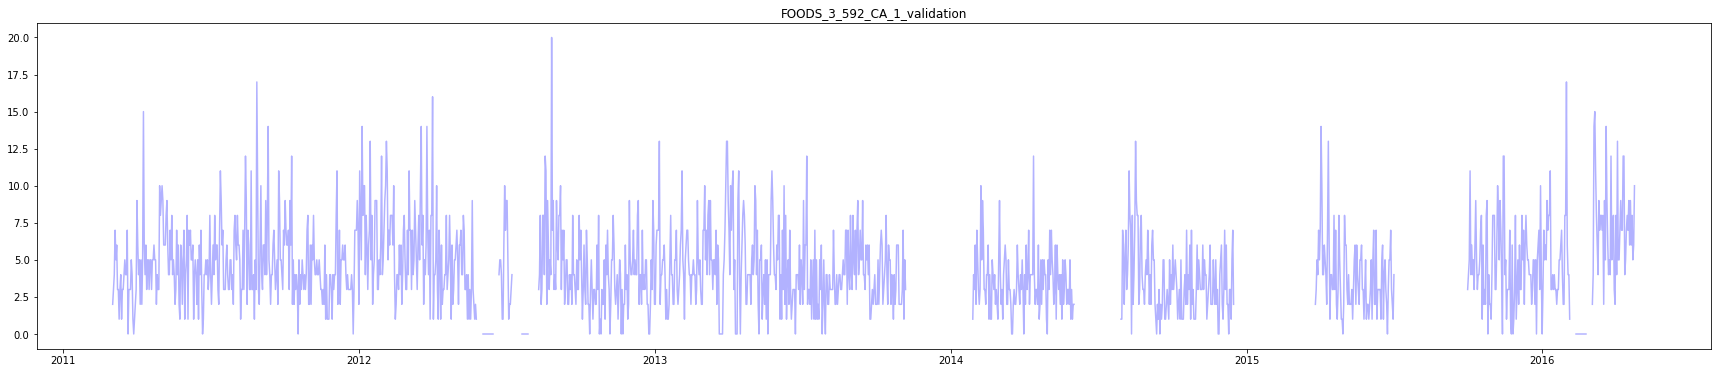

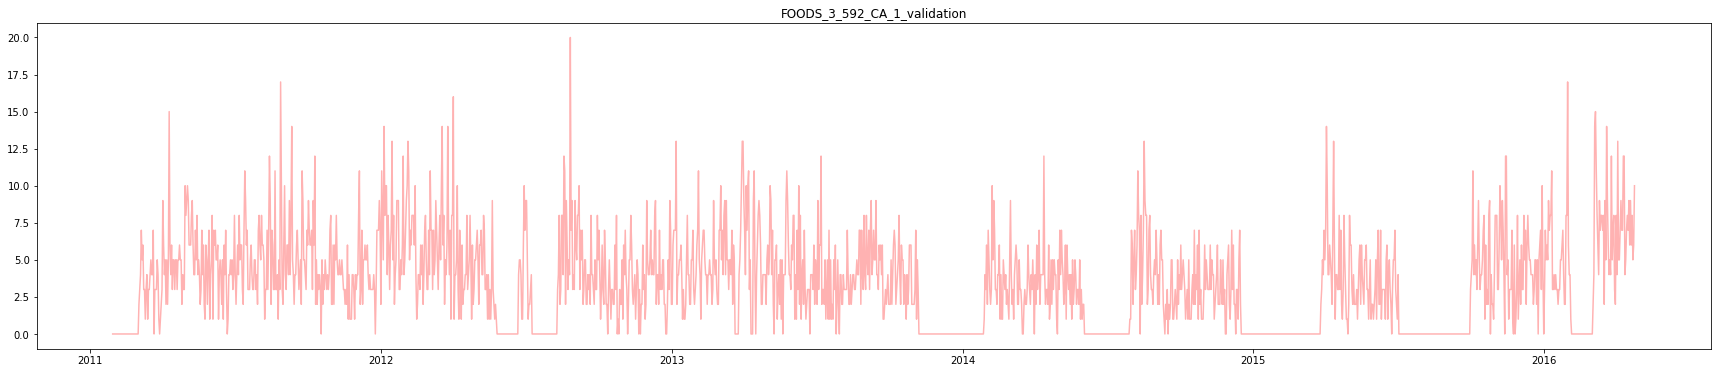

index 2012-05-25 00:00:00
next_index 2012-06-02 00:00:00
   
index 2012-06-14 00:00:00
next_index 2012-06-22 00:00:00
   
index 2012-07-08 00:00:00
next_index 2012-07-21 00:00:00
   
index 2012-07-28 00:00:00
next_index 2012-08-10 00:00:00
   
index 2013-11-06 00:00:00
next_index 2014-01-28 00:00:00
   
index 2014-06-02 00:00:00
next_index 2014-07-30 00:00:00
   
index 2014-12-16 00:00:00
next_index 2015-03-27 00:00:00
   
index 2015-07-02 00:00:00
next_index 2015-10-01 00:00:00
   
index 2016-02-04 00:00:00
next_index 2016-02-12 00:00:00
   
index 2016-02-24 00:00:00
next_index 2016-03-03 00:00:00
   


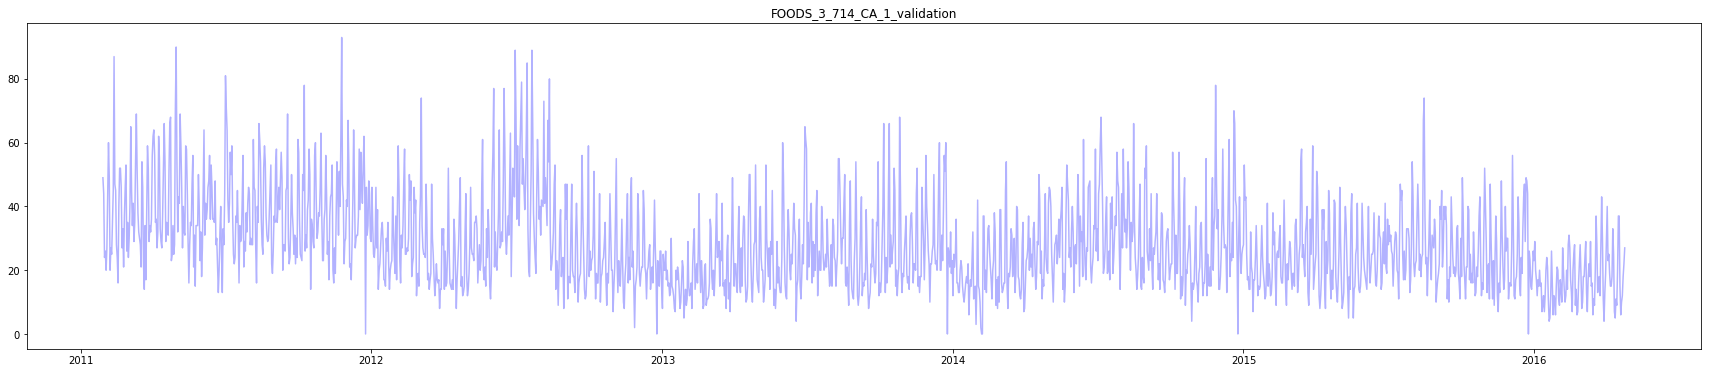

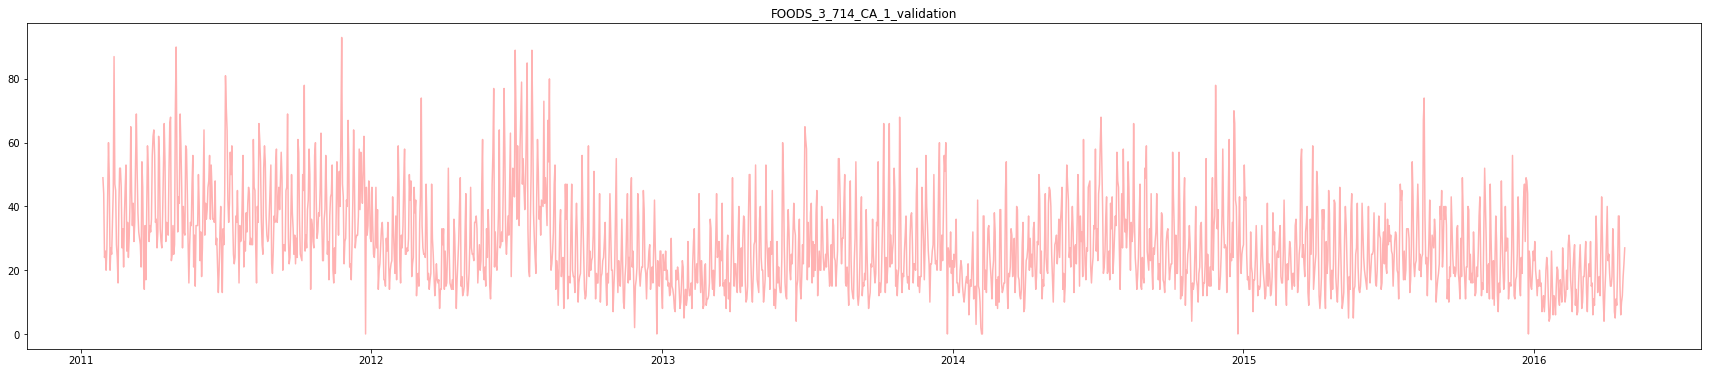

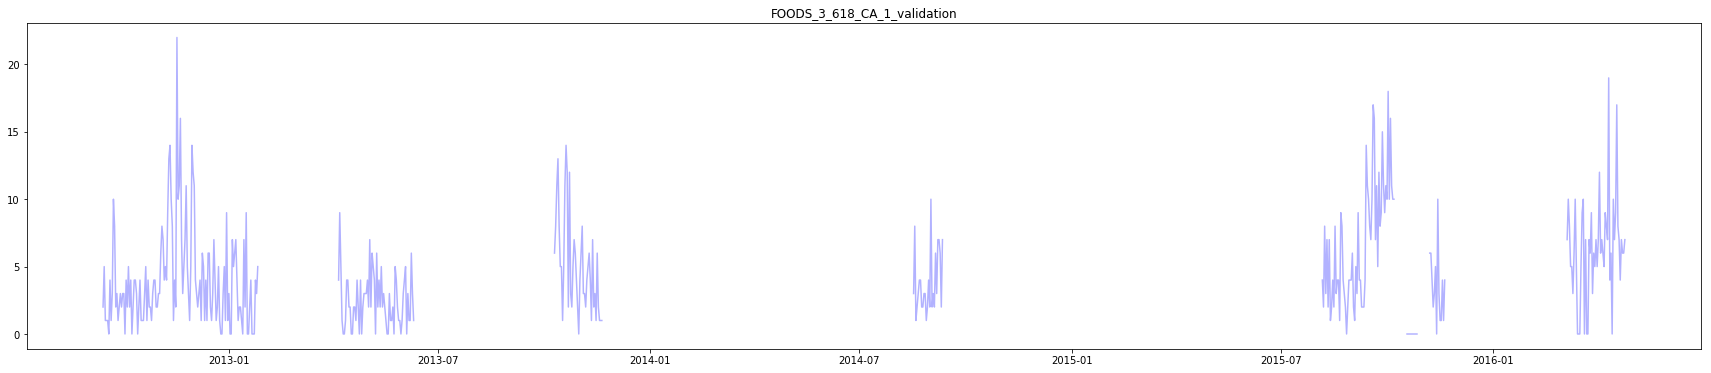

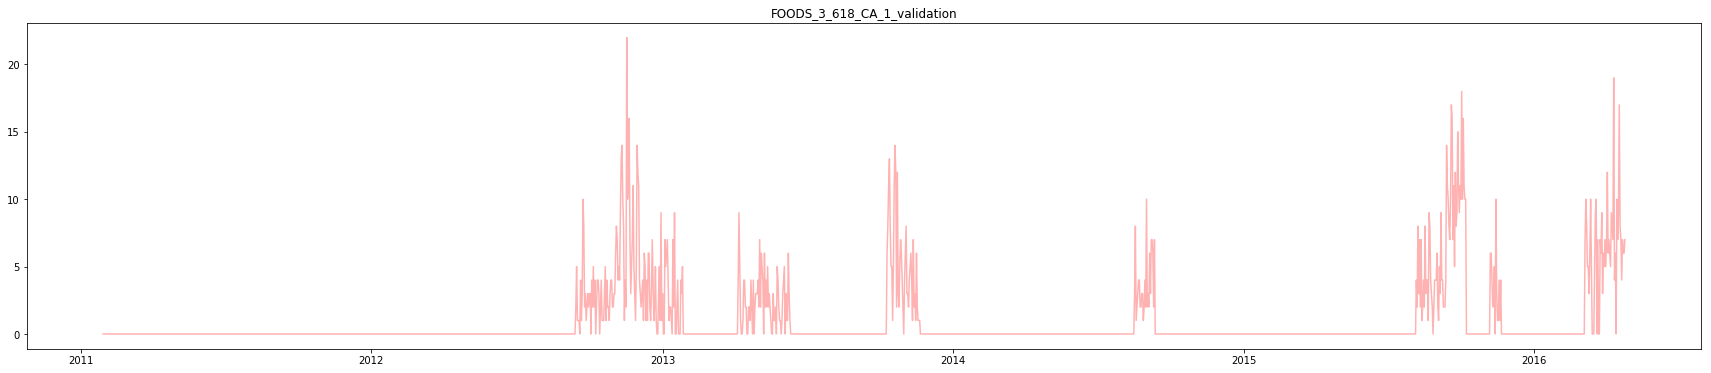

index 2013-01-26 00:00:00
next_index 2013-04-06 00:00:00
   
index 2013-06-10 00:00:00
next_index 2013-10-10 00:00:00
   
index 2013-11-20 00:00:00
next_index 2014-08-17 00:00:00
   
index 2014-09-11 00:00:00
next_index 2015-08-06 00:00:00
   
index 2015-10-07 00:00:00
next_index 2015-10-18 00:00:00
   
index 2015-10-27 00:00:00
next_index 2015-11-07 00:00:00
   
index 2015-11-20 00:00:00
next_index 2016-03-05 00:00:00
   


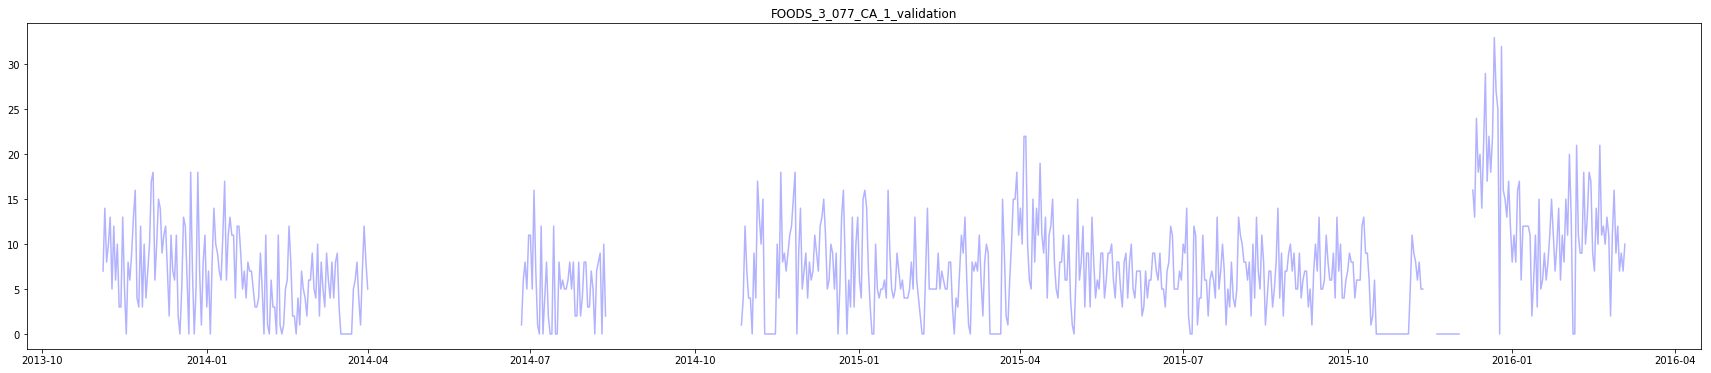

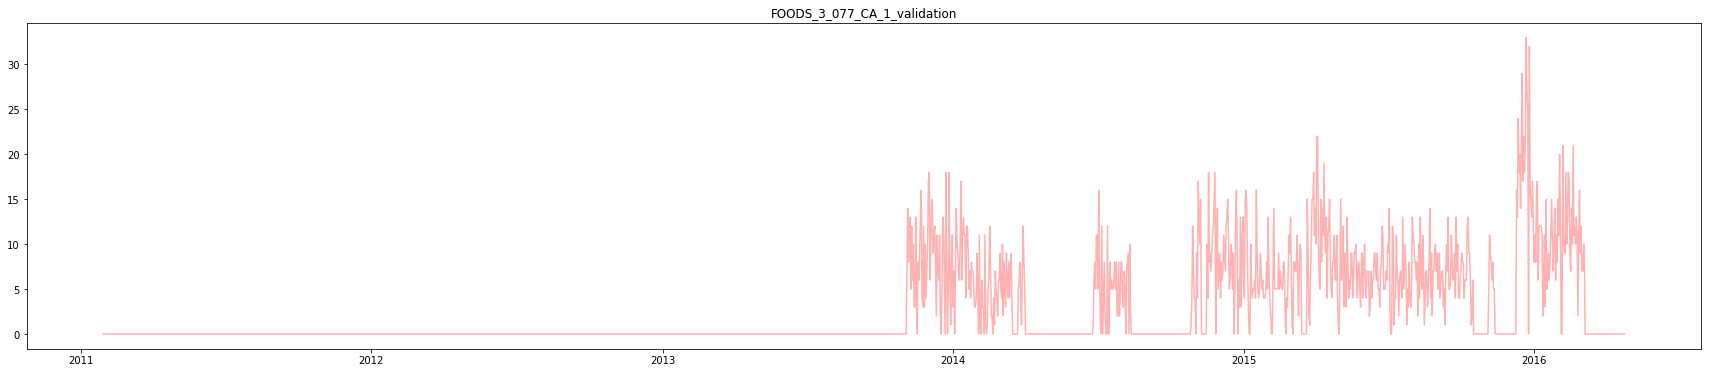

index 2014-04-01 00:00:00
next_index 2014-06-26 00:00:00
   
index 2014-08-12 00:00:00
next_index 2014-10-27 00:00:00
   
index 2015-11-12 00:00:00
next_index 2015-11-20 00:00:00
   
index 2015-12-02 00:00:00
next_index 2015-12-10 00:00:00
   


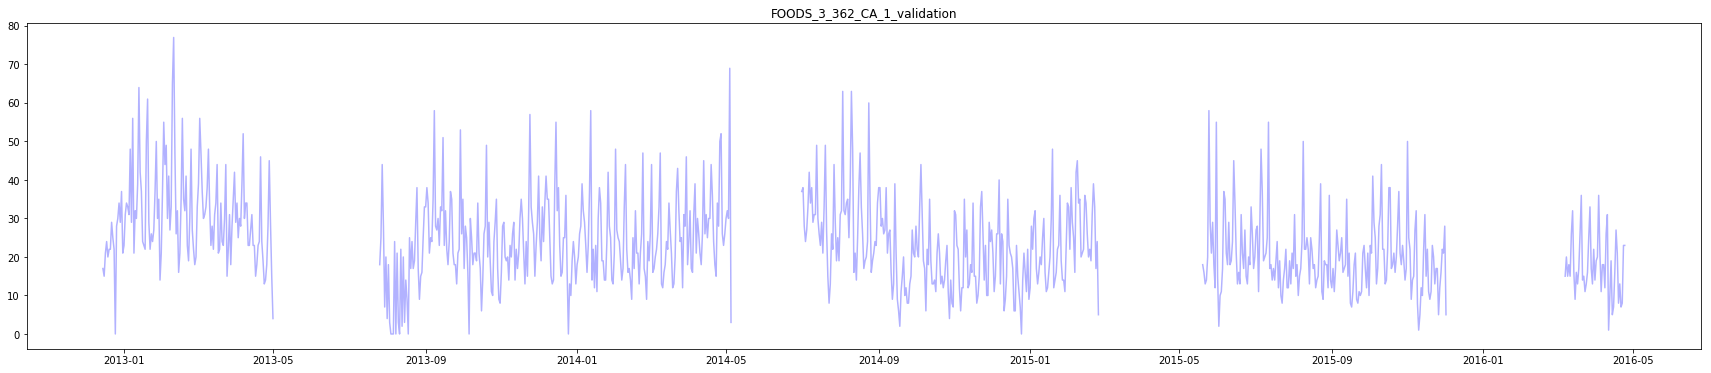

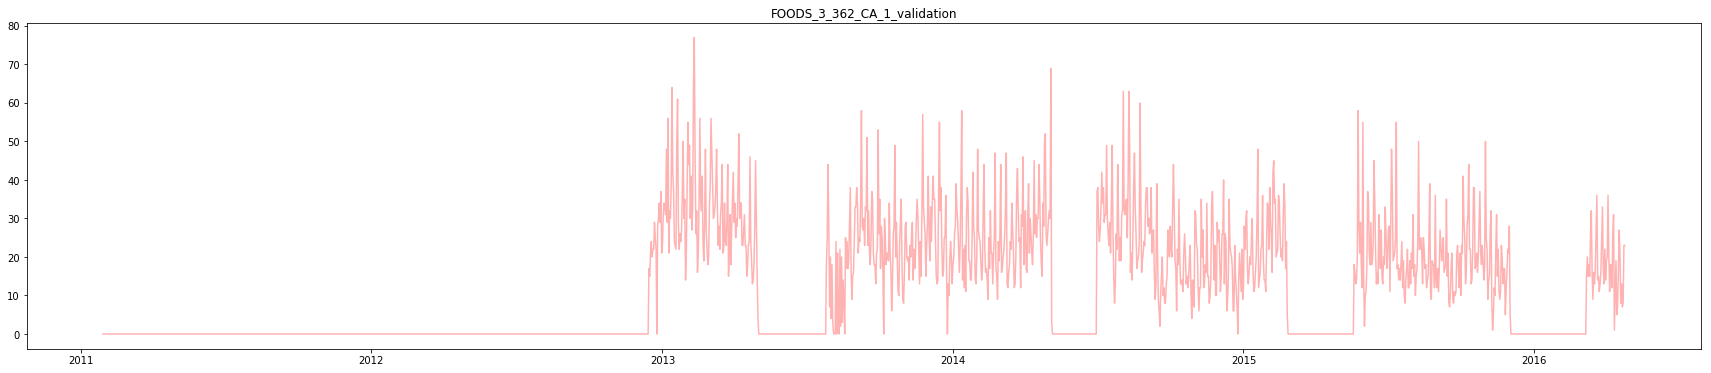

index 2013-05-01 00:00:00
next_index 2013-07-26 00:00:00
   
index 2014-05-05 00:00:00
next_index 2014-07-01 00:00:00
   
index 2015-02-25 00:00:00
next_index 2015-05-20 00:00:00
   
index 2015-12-02 00:00:00
next_index 2016-03-07 00:00:00
   


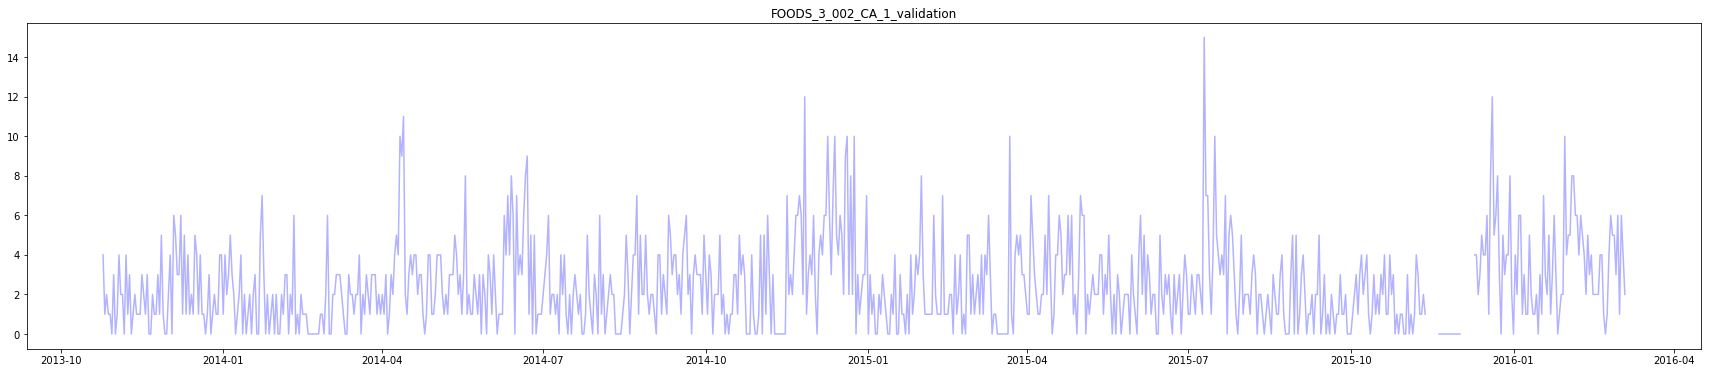

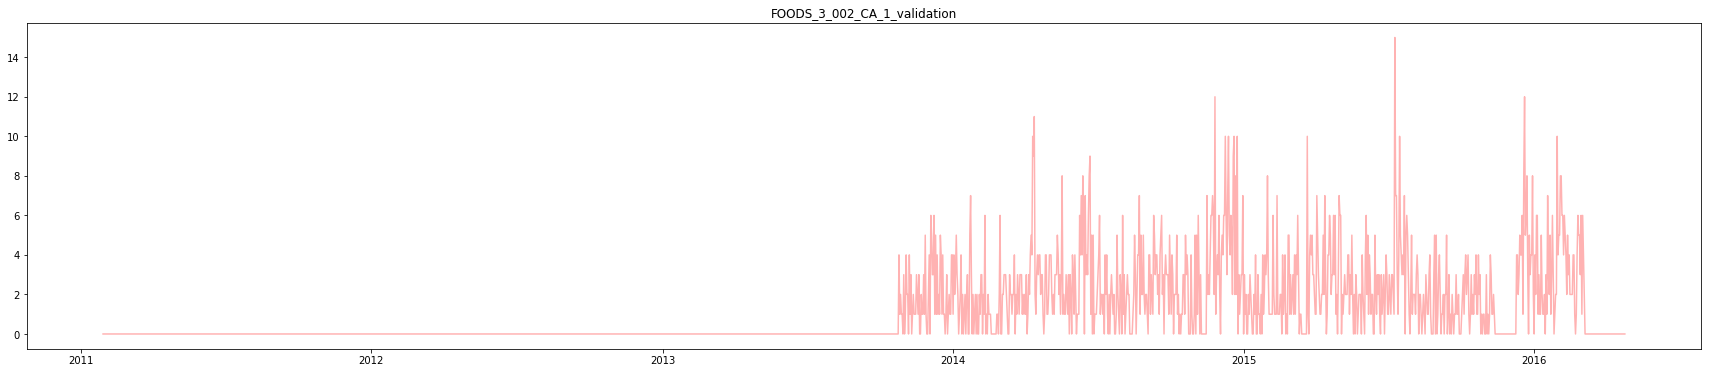

index 2015-11-12 00:00:00
next_index 2015-11-20 00:00:00
   
index 2015-12-02 00:00:00
next_index 2015-12-10 00:00:00
   


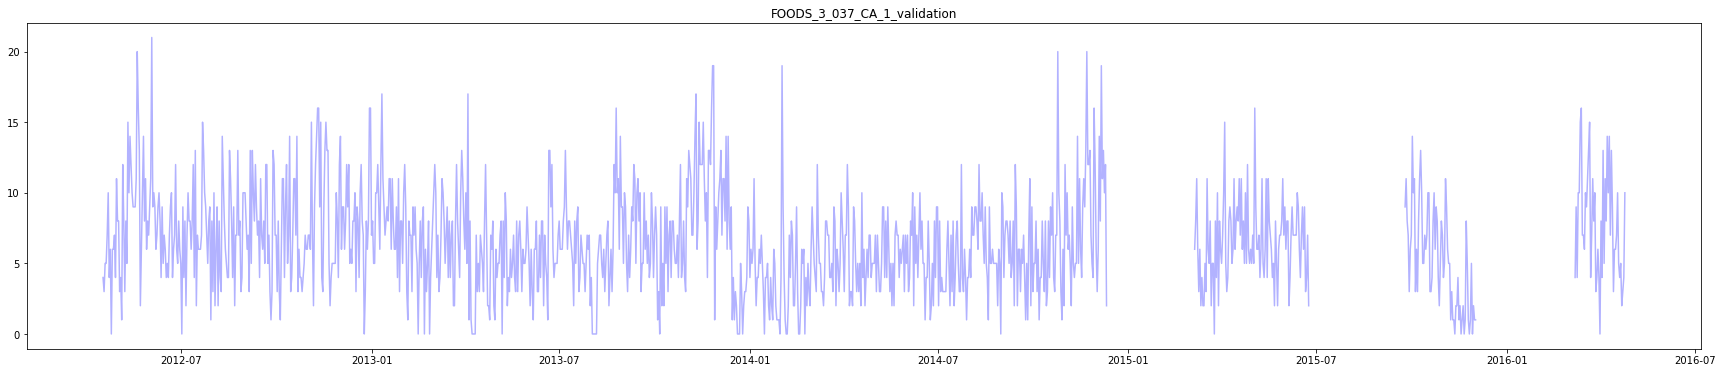

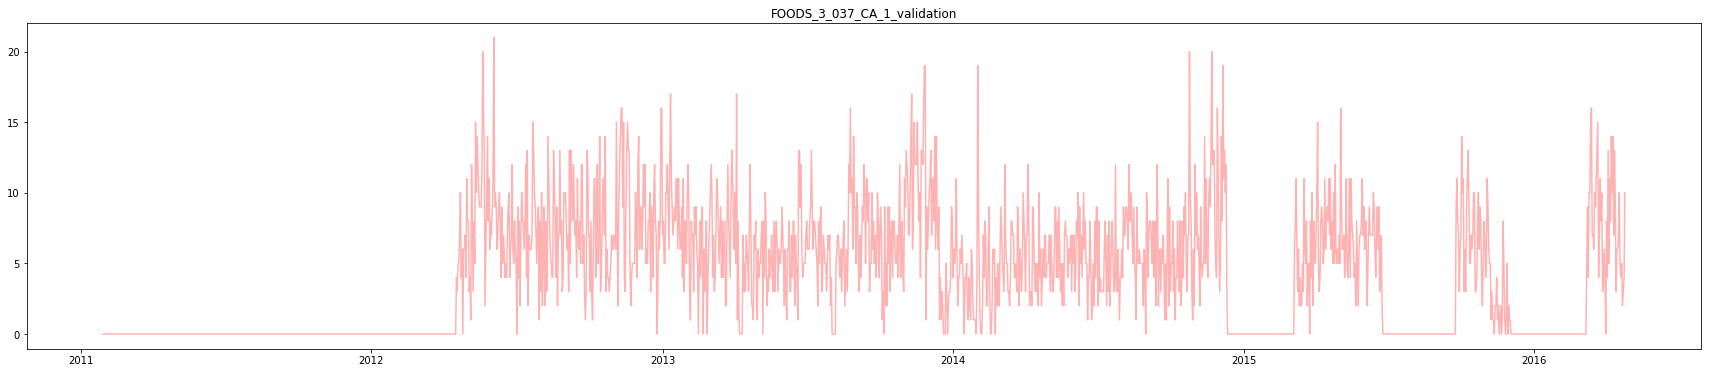

index 2014-12-11 00:00:00
next_index 2015-03-06 00:00:00
   
index 2015-06-24 00:00:00
next_index 2015-09-25 00:00:00
   
index 2015-12-02 00:00:00
next_index 2016-03-07 00:00:00
   


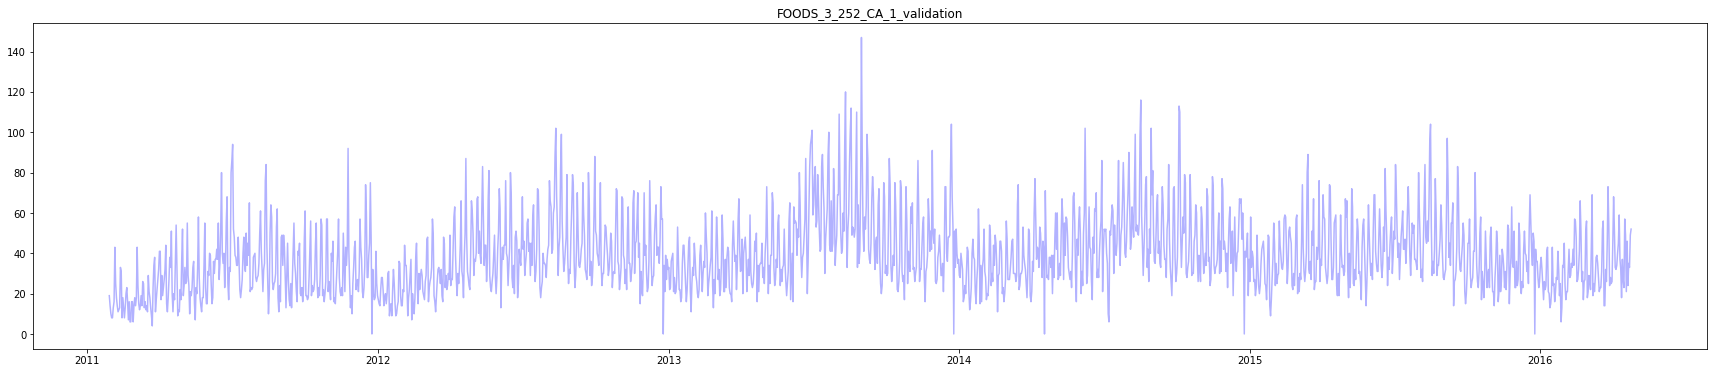

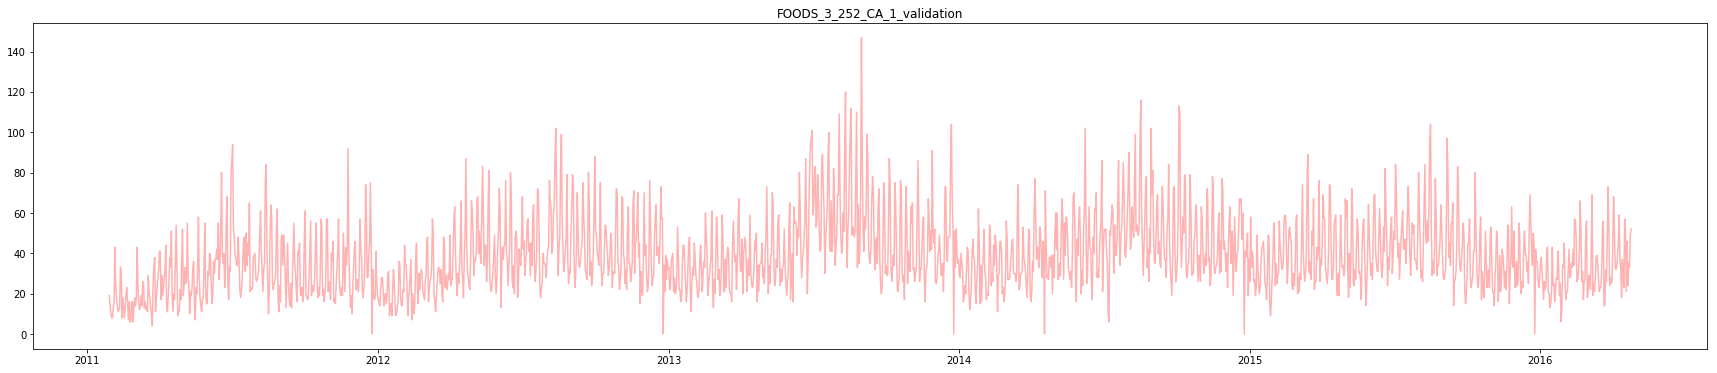

In [35]:
for col in a.index[:10]:
    tmp_df = data2[['date',col]]
    plot_special(tmp_df, c='b', alpha=0.3)
    tmp_df.dropna(inplace=True)
    
    
    indx = tmp_df.index.tolist()
    tmp_df = data[tmp_df.columns]
    
    plt.figure(figsize=(30,6))
    plt.plot(tmp_df.iloc[:,0], tmp_df.iloc[:,1], c='r' , alpha=0.3)
    plt.title(tmp_df.columns[1])
    plt.show()
    tmp_df = data2[['date',col]]
    tmp_df.dropna(inplace=True)
    for i, dx in enumerate(indx):
        try:
            d1 = tmp_df.date.values[i]
            d2 = tmp_df.date.values[i+1]
            d1 = pd.to_datetime(d1)
            d2 = pd.to_datetime(d2)
            if (d2-d1).days>1:
                
                if i<3:
                    print((d2-d1).days)
                print('index', d1)
                print('next_index',d2)
                print('   ')
        except:
            pass

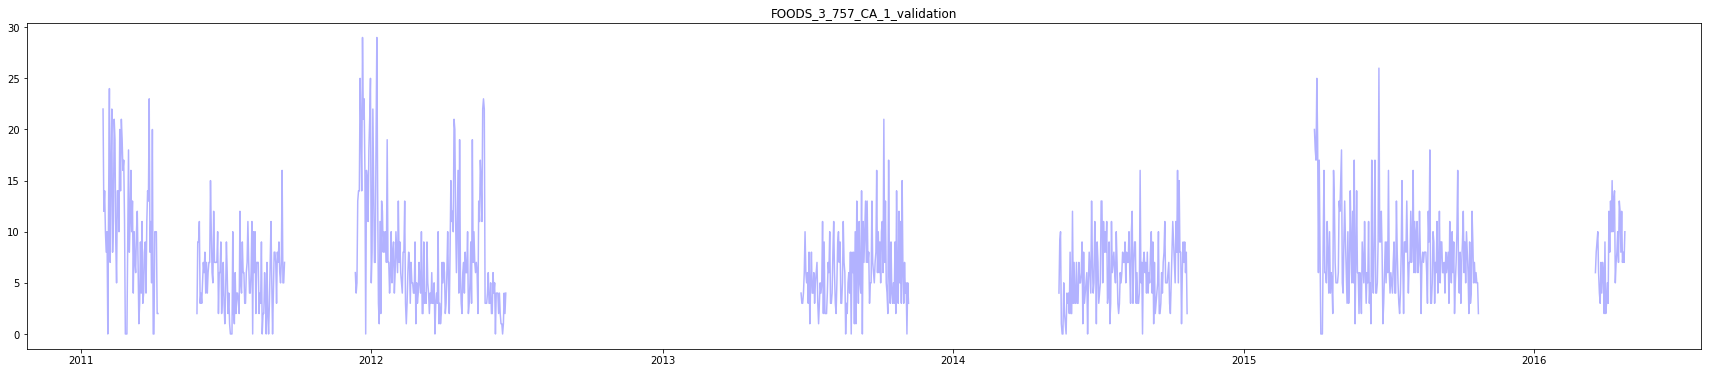

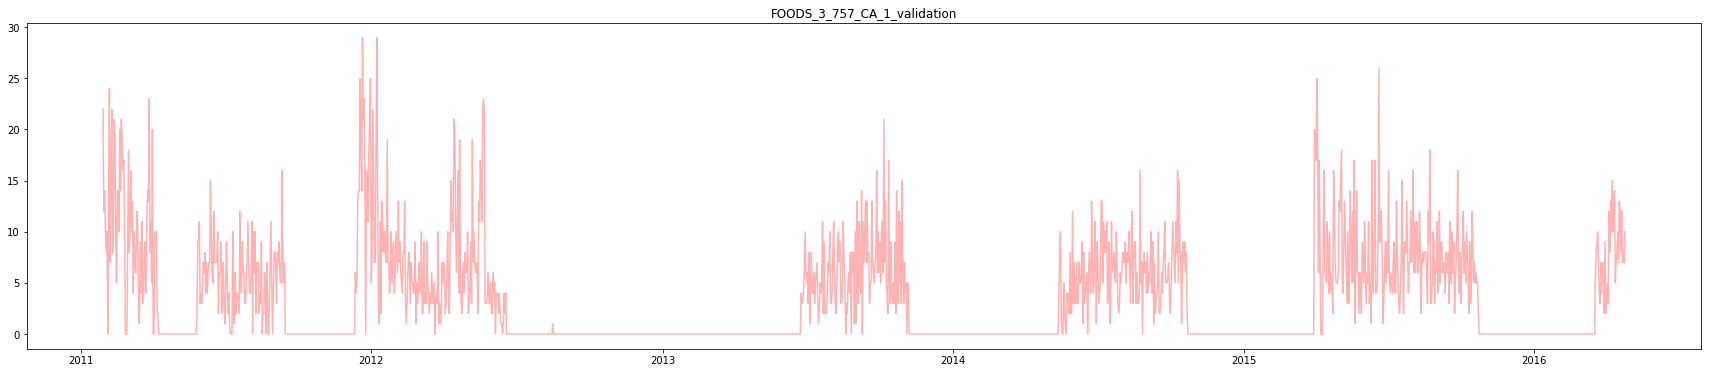

index 2011-04-08 00:00:00
next_index 2011-05-27 00:00:00
   
index 2011-09-14 00:00:00
next_index 2011-12-12 00:00:00
   
index 2012-06-18 00:00:00
next_index 2012-08-16 00:00:00
   
index 2012-08-16 00:00:00
next_index 2013-06-24 00:00:00
   
index 2013-11-06 00:00:00
next_index 2014-05-14 00:00:00
   
index 2014-10-22 00:00:00
next_index 2015-03-31 00:00:00
   
index 2015-10-23 00:00:00
next_index 2016-03-18 00:00:00
   


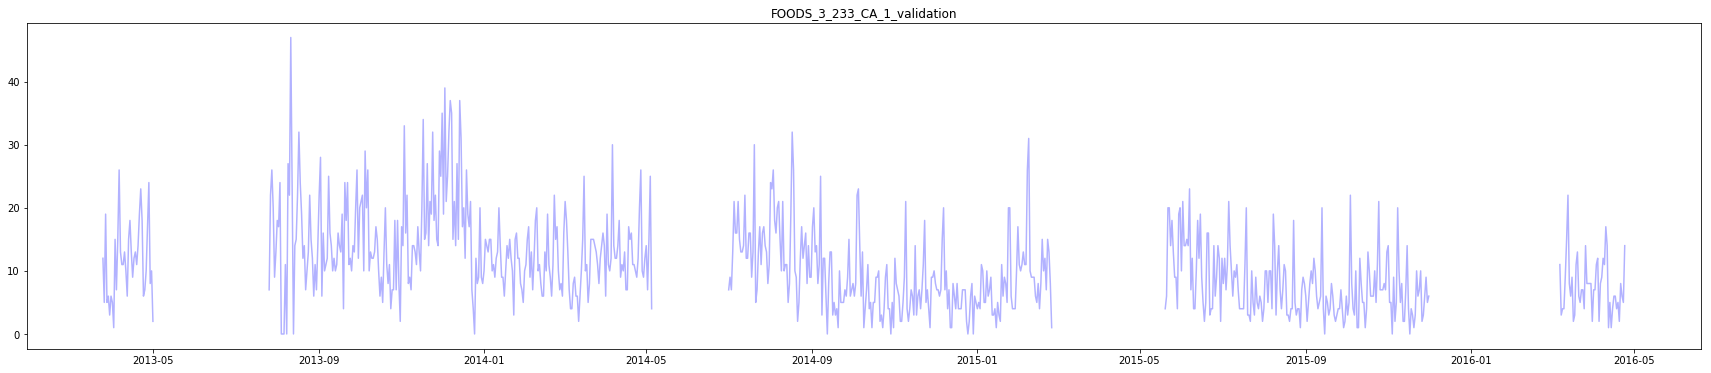

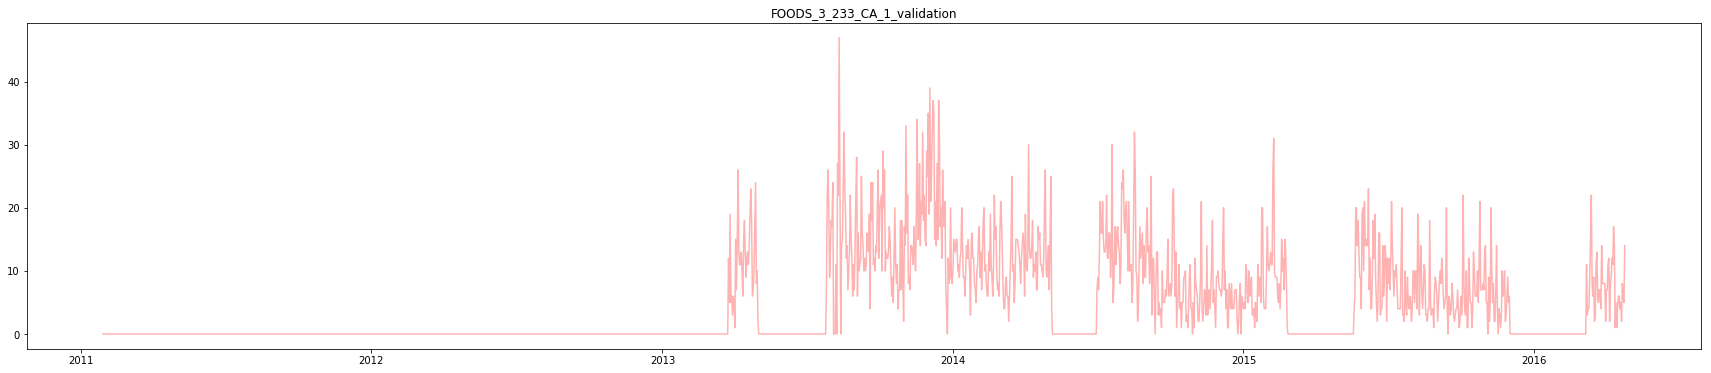

index 2013-05-01 00:00:00
next_index 2013-07-26 00:00:00
   
index 2014-05-05 00:00:00
next_index 2014-07-01 00:00:00
   
index 2015-02-25 00:00:00
next_index 2015-05-20 00:00:00
   
index 2015-12-01 00:00:00
next_index 2016-03-07 00:00:00
   


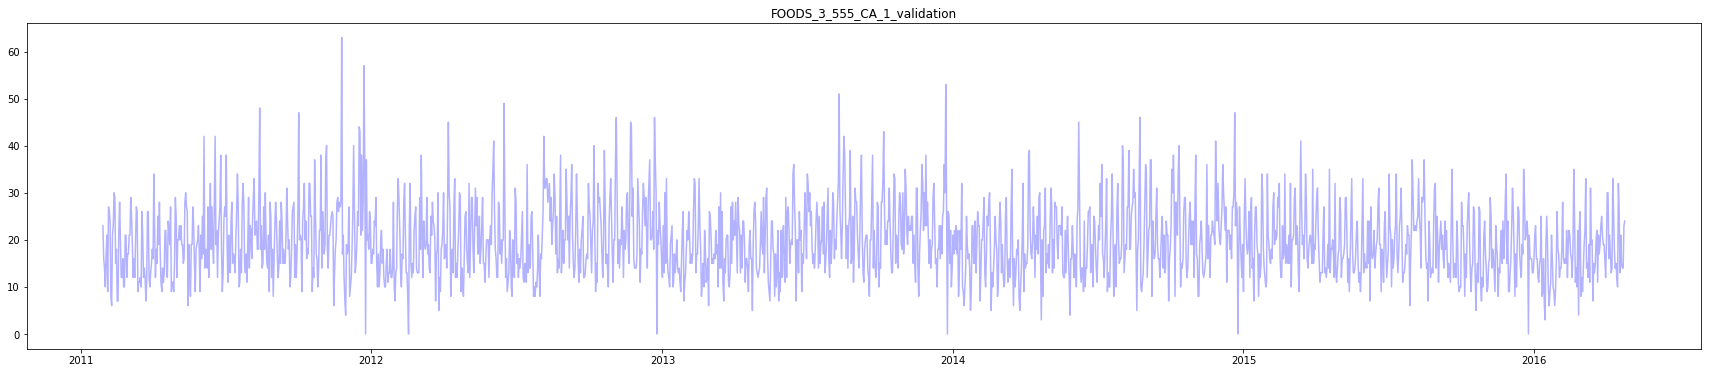

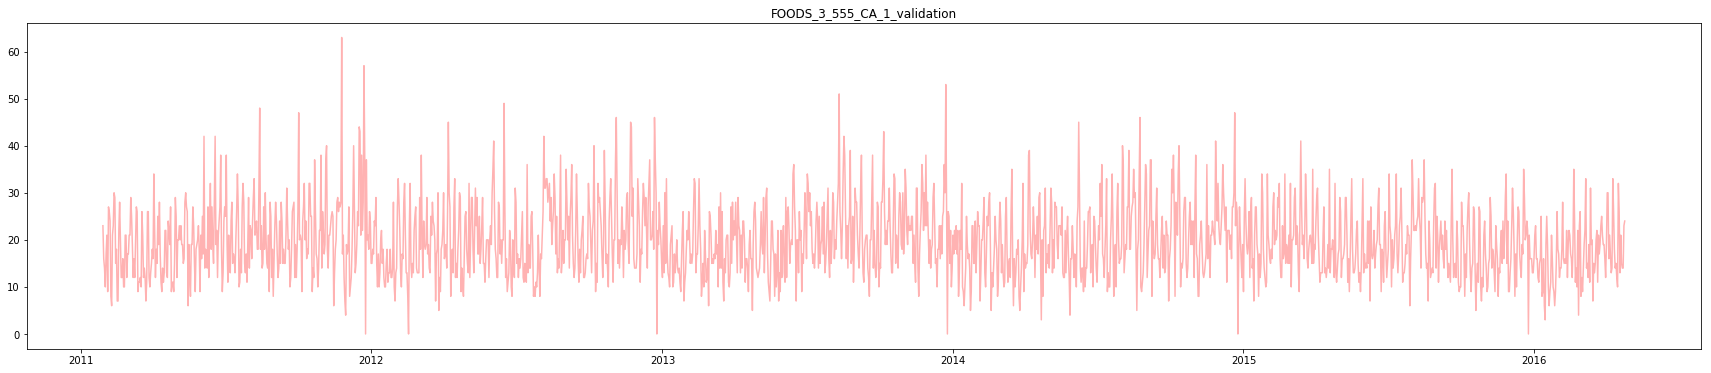

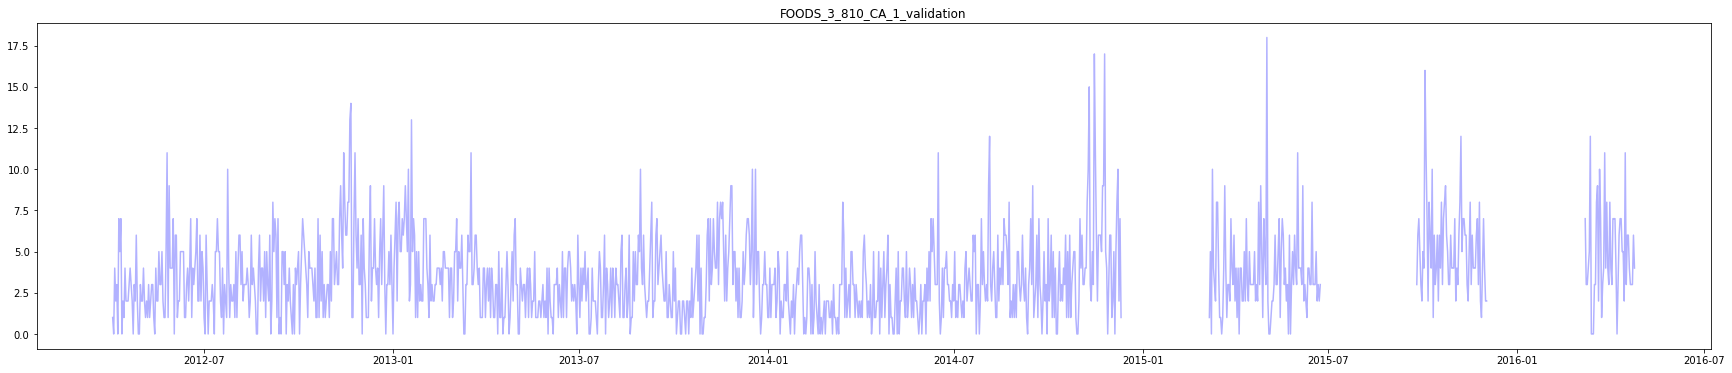

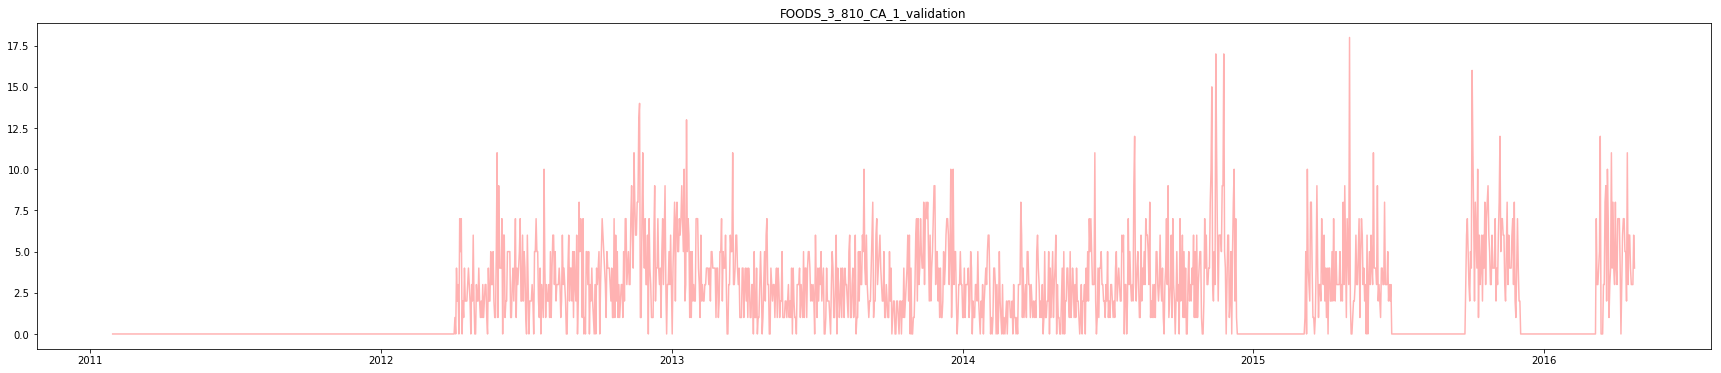

index 2014-12-11 00:00:00
next_index 2015-03-07 00:00:00
   
index 2015-06-23 00:00:00
next_index 2015-09-25 00:00:00
   
index 2015-12-02 00:00:00
next_index 2016-03-07 00:00:00
   


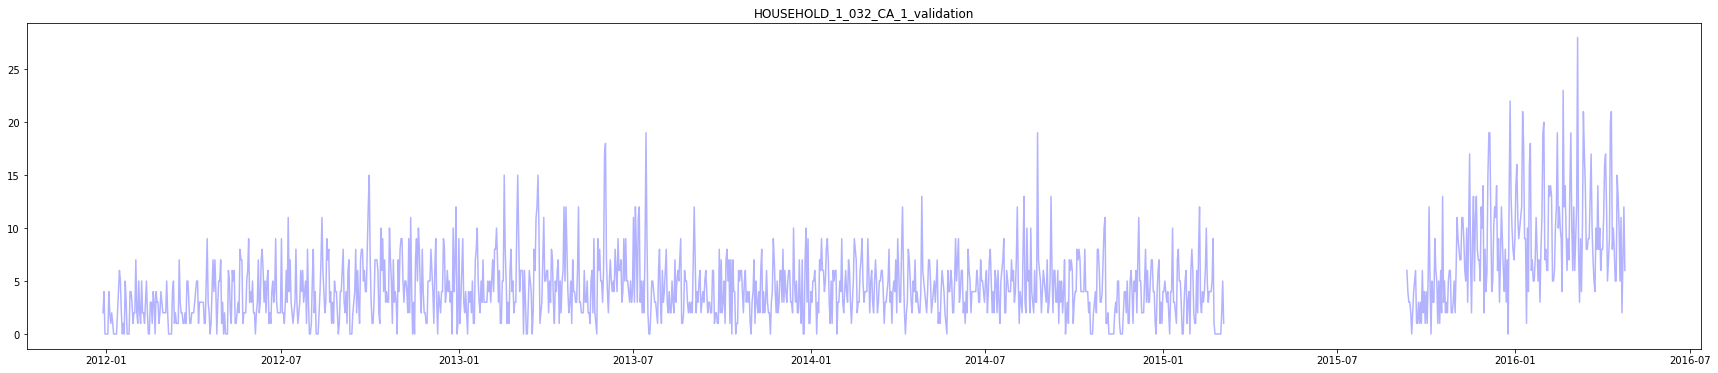

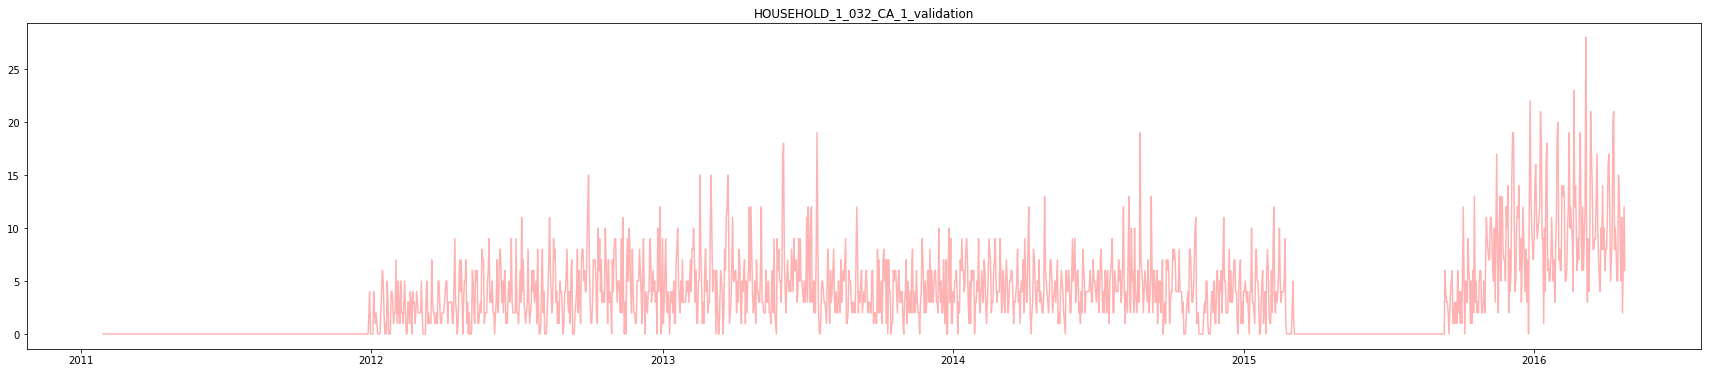

index 2015-03-05 00:00:00
next_index 2015-09-11 00:00:00
   


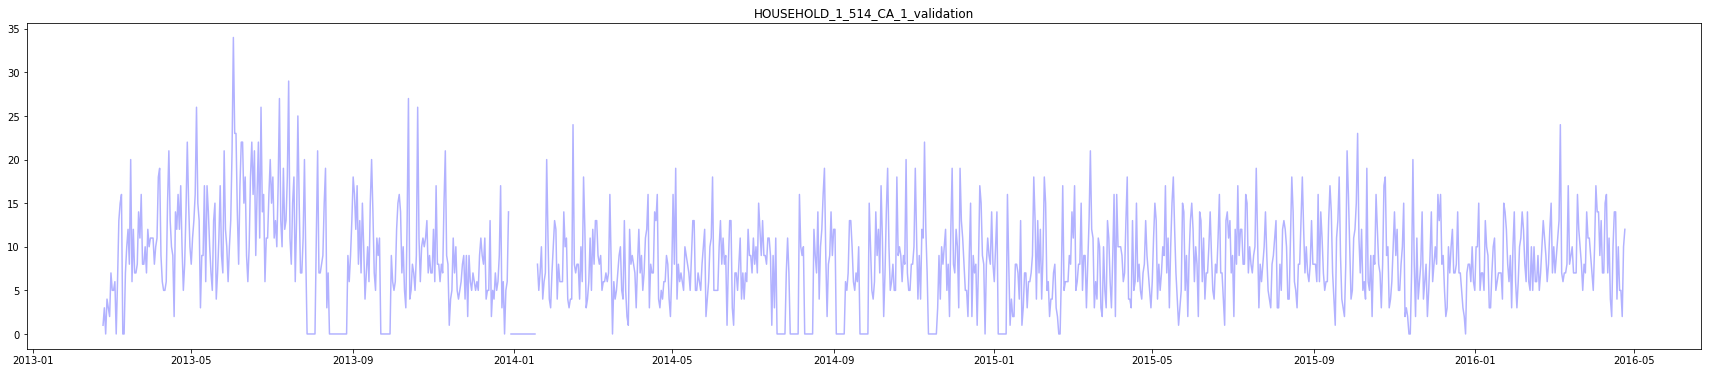

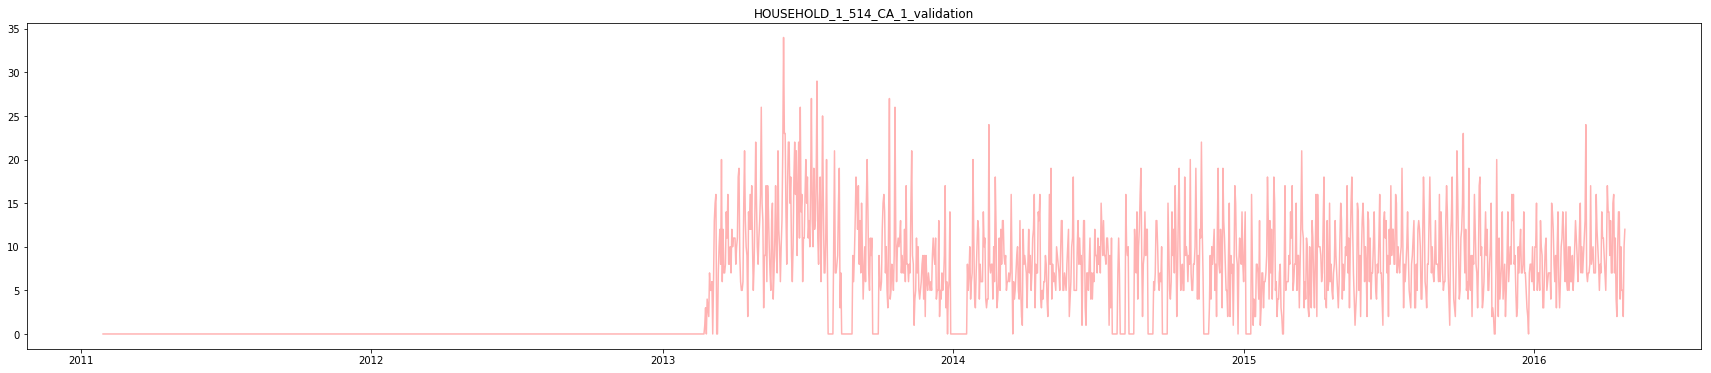

index 2013-12-28 00:00:00
next_index 2013-12-30 00:00:00
   
index 2014-01-17 00:00:00
next_index 2014-01-19 00:00:00
   


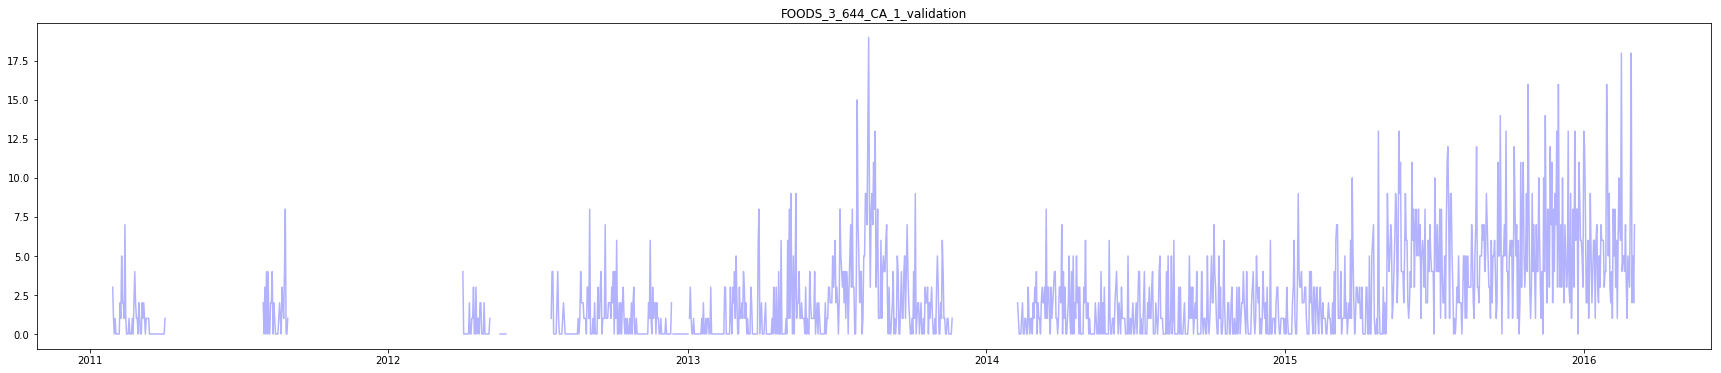

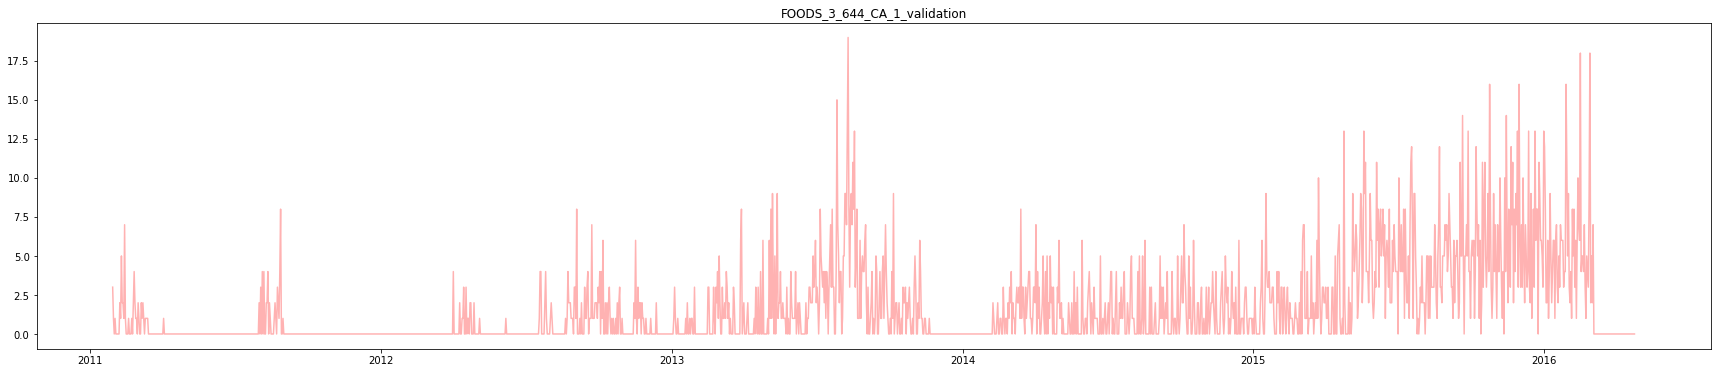

index 2011-04-03 00:00:00
next_index 2011-08-01 00:00:00
   
index 2011-08-31 00:00:00
next_index 2012-04-01 00:00:00
   
index 2012-05-04 00:00:00
next_index 2012-05-17 00:00:00
   
index 2012-05-24 00:00:00
next_index 2012-06-06 00:00:00
   
index 2012-06-06 00:00:00
next_index 2012-07-18 00:00:00
   
index 2012-12-12 00:00:00
next_index 2012-12-14 00:00:00
   
index 2013-01-01 00:00:00
next_index 2013-01-03 00:00:00
   
index 2013-11-20 00:00:00
next_index 2014-02-08 00:00:00
   


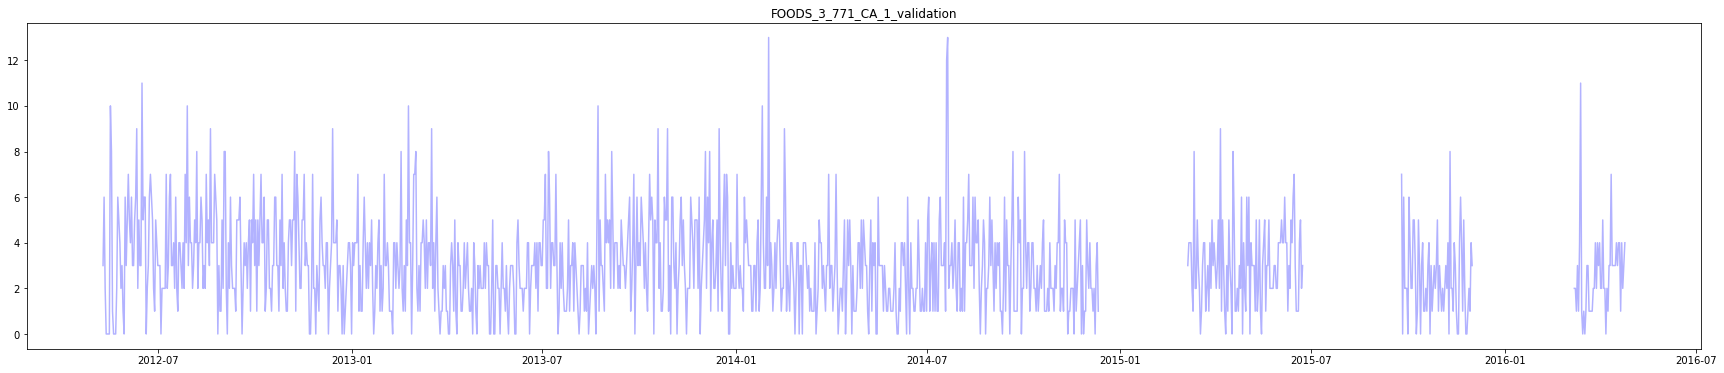

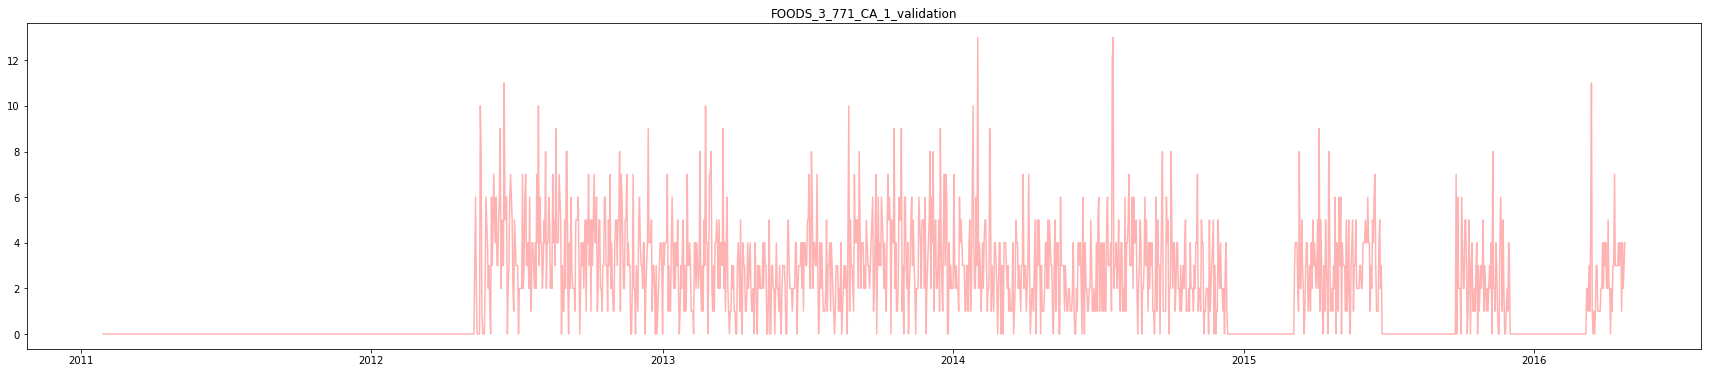

index 2014-12-11 00:00:00
next_index 2015-03-06 00:00:00
   
index 2015-06-23 00:00:00
next_index 2015-09-25 00:00:00
   
index 2015-12-01 00:00:00
next_index 2016-03-07 00:00:00
   


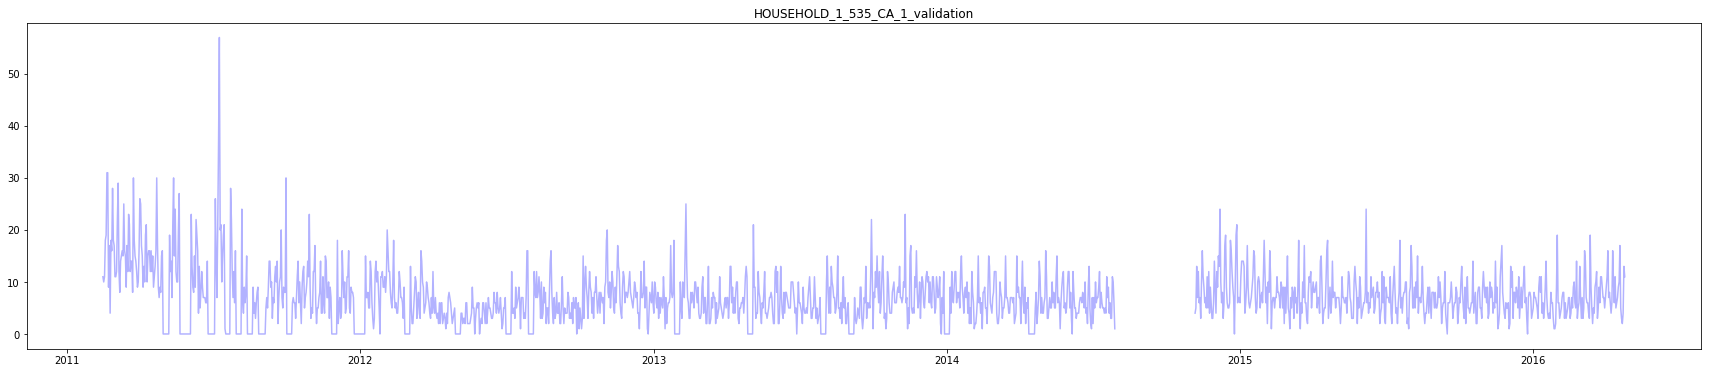

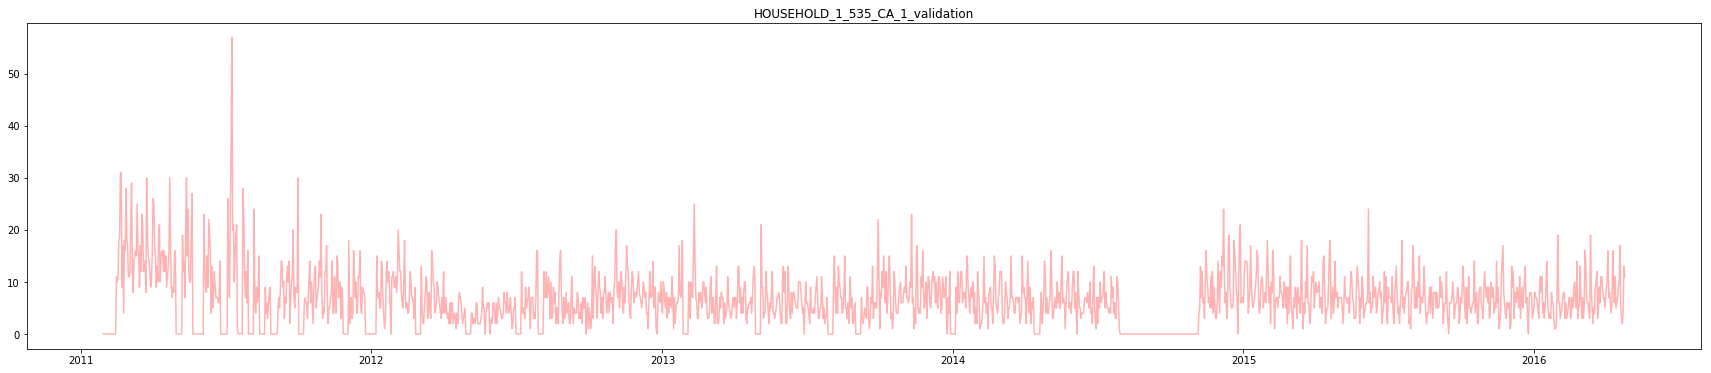

index 2014-07-29 00:00:00
next_index 2014-11-06 00:00:00
   


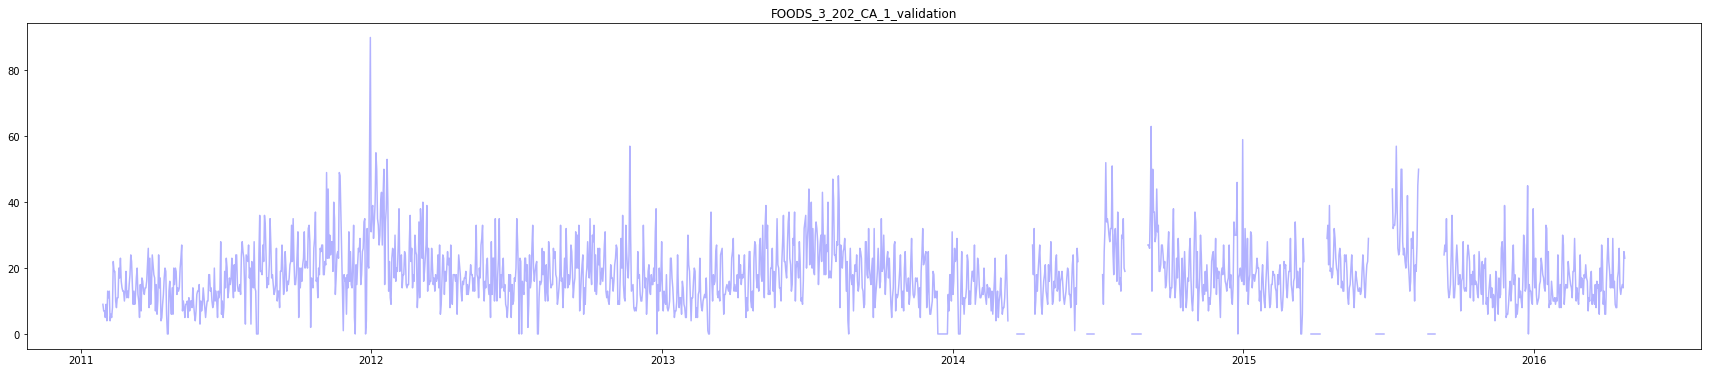

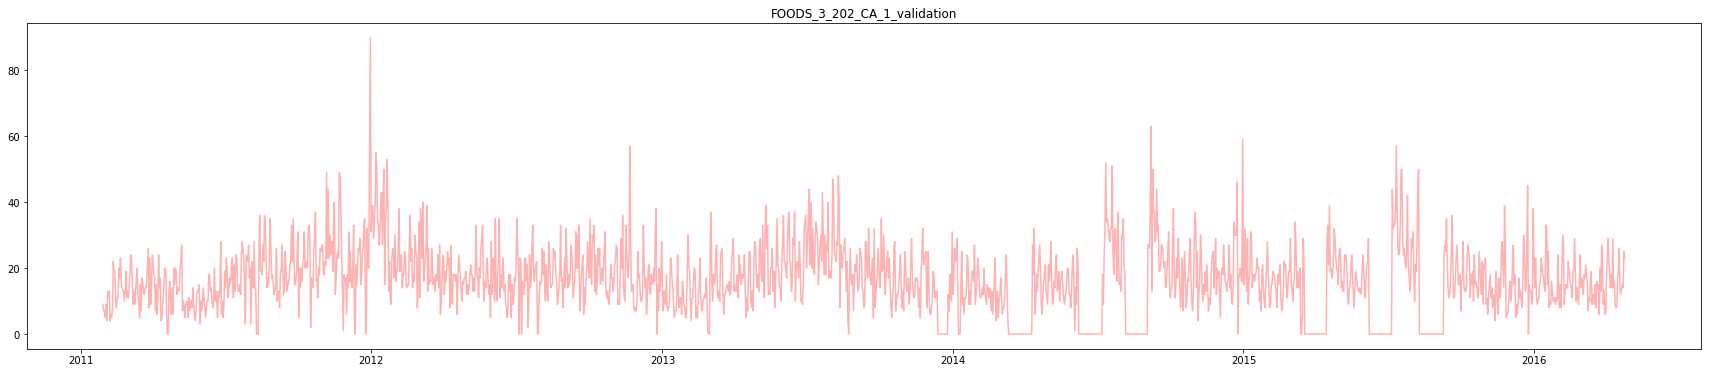

index 2014-03-11 00:00:00
next_index 2014-03-22 00:00:00
   
index 2014-03-31 00:00:00
next_index 2014-04-11 00:00:00
   
index 2014-06-07 00:00:00
next_index 2014-06-18 00:00:00
   
index 2014-06-27 00:00:00
next_index 2014-07-08 00:00:00
   
index 2014-08-05 00:00:00
next_index 2014-08-14 00:00:00
   
index 2014-08-25 00:00:00
next_index 2014-09-03 00:00:00
   
index 2015-03-18 00:00:00
next_index 2015-03-27 00:00:00
   
index 2015-04-07 00:00:00
next_index 2015-04-16 00:00:00
   
index 2015-06-07 00:00:00
next_index 2015-06-17 00:00:00
   
index 2015-06-27 00:00:00
next_index 2015-07-07 00:00:00
   
index 2015-08-09 00:00:00
next_index 2015-08-21 00:00:00
   
index 2015-08-29 00:00:00
next_index 2015-09-10 00:00:00
   


In [36]:
for col in a.index[10:20]:
    tmp_df = data2[['date',col]]
    plot_special(tmp_df, c='b', alpha=0.3)
    tmp_df.dropna(inplace=True)
    
    
    indx = tmp_df.index.tolist()
    tmp_df = data[tmp_df.columns]
    
    plt.figure(figsize=(30,6))
    plt.plot(tmp_df.iloc[:,0], tmp_df.iloc[:,1], c='r' , alpha=0.3)
    plt.title(tmp_df.columns[1])
    plt.show()
    tmp_df = data2[['date',col]]
    tmp_df.dropna(inplace=True)
    for i, dx in enumerate(indx):
        try:
            d1 = tmp_df.date.values[i]
            d2 = tmp_df.date.values[i+1]
            d1 = pd.to_datetime(d1)
            d2 = pd.to_datetime(d2)
            if (d2-d1).days>1:
                
                if i<3:
                    print((d2-d1).days)
                print('index', d1)
                print('next_index',d2)
                print('   ')
        except:
            pass

In [39]:
data.date.describe()

count                    1913
unique                   1913
top       2014-07-27 00:00:00
freq                        1
first     2011-01-29 00:00:00
last      2016-04-24 00:00:00
Name: date, dtype: object

In [45]:
n = data[-10:].sum(axis=0)
data[n[n==0].index][-10:]

HOBBIES_1_018_CA_1_validation  HOBBIES_1_031_CA_1_validation  \
1903                              0                              0   
1904                              0                              0   
1905                              0                              0   
1906                              0                              0   
1907                              0                              0   
1908                              0                              0   
1909                              0                              0   
1910                              0                              0   
1911                              0                              0   
1912                              0                              0   

      HOBBIES_1_035_CA_1_validation  HOBBIES_1_063_CA_1_validation  \
1903                              0                              0   
1904                              0                              0   
1905                              0                              0   
1906                              0                              0   
1907                              0                              0   
1908                              0                              0   
1909                              0                              0   
1910                              0                              0   
1911                              0                              0   
1912                              0                              0   

      HOBBIES_1_065_CA_1_validation  HOBBIES_1_070_CA_1_validation  \
1903                              0                              0   
1904                              0                              0   
1905                              0                              0   
1906                              0                              0   
1907                              0                              0   
1908                              0                              0   
1909                              0                              0   
1910                              0                              0   
1911                              0                              0   
1912                              0                              0   

      HOBBIES_1_092_CA_1_validation  HOBBIES_1_095_CA_1_validation  \
1903                              0                              0   
1904                              0                              0   
1905                              0                              0   
1906                              0                              0   
1907                              0                              0   
1908                              0                              0   
1909                              0                              0   
1910                              0                              0   
1911                              0                              0   
1912                              0                              0   

      HOBBIES_1_122_CA_1_validation  HOBBIES_1_149_CA_1_validation  \
1903                              0                              0   
1904                              0                              0   
1905                              0                              0   
1906                              0                              0   
1907                              0                              0   
1908                              0                              0   
1909                              0                              0   
1910                              0                              0   
1911                              0                              0   
1912                              0                              0   

                 ...               FOODS_3_693_WI_3_validation  \
1903             ...                                         0   
1904             ..